# Mental Health Binary Classification

### [dataset](https://www.kaggle.com/datasets/bhadramohit/mental-health-dataset)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

License: [Community Data License Agreement](https://cdla.dev/sharing-1-0/)

## **Executive Summary**

### **Objective**

This report presents the development and evaluation of a binary classification model designed to analyze patterns in demographic, health, and occupational data to predict health-related outcomes. Using a dataset with variables like age, work hours, physical activity hours, and various health indicators, the model aims to uncover associations within the data, focusing on insights into demographic and occupational impacts on health and stress factors.

### **Data Insights**

**1. Continuous Variables Analysis**
- **Age, Sleep Hours, and Work Hours Distributions:** Histograms of these variables show an approximately even spread without strong skewness, suggesting no notable clustering around specific values. The distributions are largely uniform, indicating a balanced representation across different ranges.
- **Relationships Among Continuous Variables:** Scatter plots of Sleep_Hours versus Age, faceted by Occupation, display mostly flat trend lines, indicating weak or no correlation between Age and Sleep_Hours across occupations. The pair plot for continuous variables such as Age, Sleep_Hours, Work_Hours, and Physical_Activity_Hours confirms minimal interdependence, as no clear patterns or linear relationships are visible.
- **Correlation Matrix:** A correlation matrix corroborates the lack of strong associations among continuous variables, with all correlation values close to zero, suggesting that these features are largely independent.

**2. Categorical Variables Analysis**
- **Gender, Occupation, Country, and Severity Distributions:** Bar charts display balanced representations across gender categories, varied occupational groups, and even distribution across countries like the USA, Canada, Australia, and the UK. Severity levels are diverse, with “Low” severity most common, followed by “Medium” and “High.”
- **Consultation History and Stress Level:** Consultation_History and Stress_Level both show balanced distributions, with a slight tendency toward "Medium" stress levels over "Low" and "High." This balanced distribution could indicate varied but proportionate experiences across these factors.
- **Interrelationships:** Heatmaps reveal demographic and health patterns, with specific gender and occupation combinations showing higher counts in certain categories. Occupational patterns differ across regions, with healthcare workers represented across severity levels and specific occupations showing distinct stress level distributions.

**3. Advanced Visualizations**
- **Demographic and Health Patterns:** The bar charts illustrate interactions between Gender, Occupation, and other demographic factors, indicating that each group displays varied counts across categories, reflecting a diverse sample. Occupation is analyzed against factors like Country and Stress Level, highlighting representation in specific work sectors across health factors.
- **Continuous Variable Comparisons:** Box plots of Age, Sleep Hours, Work Hours, and Physical Activity Hours across Gender, Occupation, and Country show similar distributions with overlapping ranges and median values. This uniformity suggests that these continuous measures do not significantly vary based on demographic categories, showing consistency within the dataset.

### **Model Development and Selection**

**Model Evaluation**
- **Best Model:** Model 3 achieved an accuracy of 50.3% and an ROC AUC of 49.1%, indicating near-random performance. Despite this, certain statistically significant variables were identified, such as:
  - **Geographic and Occupational Influence:** Interactions like `C(Occupation)[T.IT]:C(Country)[T.Germany]` (coefficient: -3.8900, p-value: 0.0297) and `C(Occupation)[T.Engineering]:C(Country)[T.India]` (coefficient: 3.4107, p-value: 0.0307).
  - **Physical and Work Activity:** Physical_Activity_Hours (coefficient: 38.5331, p-value: 0.0357) shows a positive association, while polynomial terms involving Work_Hours and Physical_Activity_Hours exhibit mixed directions. These significant coefficients highlight potential areas for further exploration despite the model's limited predictive power.

### **Implications**

Although the selected model demonstrates limited predictive accuracy with its accuracy and ROC AUC close to chance levels, the identification of significant terms related to occupation, geographic location, and physical activity provides potential insights into demographic and occupational impacts on health factors. These findings could inform more targeted analyses or guide data collection strategies to enhance model performance.

### **Recommendations and Next Steps**

1. **Improve Model Accuracy:** Consider alternative modeling approaches or additional feature engineering to improve predictive power.
2. **Investigate Feature Interactions:** Conduct deeper analyses on interaction terms involving demographic and occupational variables to better understand their impacts.
3. **Address Model Limitations:** Explore methods to handle near-random model performance, possibly by balancing the dataset or testing other algorithms.
4. **Expand Data Collection:** To enhance predictive accuracy, include more health-related or lifestyle features to capture a broader range of influences.

### **Conclusion**

This analysis underscores the importance of data exploration in uncovering demographic and health-related patterns. While the model’s predictive accuracy is limited, significant terms related to occupation, country, and physical activity provide a foundation for further exploration. With refined feature selection and additional data, this model could contribute to identifying and understanding health risk factors across populations. This model should **NEVER** be used in production due to its extremely poor accuracy and ROC AUC scores.

## Import Main Modules & Dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import itertools

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
df = pd.read_csv('mental_health_dataset.csv')

## Perform Basic Analysis

In [ ]:
df.shape

(1000, 12)

In [ ]:
df.dtypes

User_ID                      int64
Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition     object
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object

In [ ]:
_ = [print(f'{df[column].value_counts()}\n') for column in df.columns]

User_ID
1       1
672     1
659     1
660     1
661     1
       ..
339     1
340     1
341     1
342     1
1000    1
Name: count, Length: 1000, dtype: int64

Age
38    30
62    29
26    29
54    28
56    28
47    28
36    26
43    26
28    25
21    25
65    25
30    24
53    24
64    24
61    24
34    23
45    23
31    23
23    22
44    22
22    21
33    21
60    21
37    20
58    20
63    20
32    20
24    20
52    19
57    19
27    19
55    19
25    19
20    19
42    18
46    18
39    17
48    16
49    16
50    16
19    16
40    15
18    15
41    15
59    14
51    14
29    13
35    12
Name: count, dtype: int64

Gender
Female               270
Non-binary           267
Male                 247
Prefer not to say    216
Name: count, dtype: int64

Occupation
Other          161
Healthcare     149
Engineering    148
Finance        139
Sales          135
Education      135
IT             133
Name: count, dtype: int64

Country
Australia    160
India        155
USA          152
Germany      1

In [ ]:
df.nunique()

User_ID                    1000
Age                          48
Gender                        4
Occupation                    7
Country                       7
Mental_Health_Condition       2
Severity                      3
Consultation_History          2
Stress_Level                  3
Sleep_Hours                  61
Work_Hours                   51
Physical_Activity_Hours      11
dtype: int64

## Drop Unused Variables

In [ ]:
df.drop(['User_ID'],
        axis=1,
        inplace=True)

## Verify/Handle Missing Values

In [ ]:
df.isna().sum()

Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy = df_copy.dropna()

In [ ]:
df_copy.isna().sum()

Age                        0
Gender                     0
Occupation                 0
Country                    0
Mental_Health_Condition    0
Severity                   0
Consultation_History       0
Stress_Level               0
Sleep_Hours                0
Work_Hours                 0
Physical_Activity_Hours    0
dtype: int64

## Convert Target to Binary

In [ ]:
df_copy['Mental_Health_Condition'] = df_copy['Mental_Health_Condition'].apply(lambda x: 1 if x == 'Yes' else 0)

## Create Input & Output Vars

In [ ]:
cat_input_vars = ['Gender',
                  'Occupation',
                  'Country',
                  'Severity',
                  'Consultation_History',
                  'Stress_Level']

In [ ]:
cont_input_vars = ['Age',
                   'Sleep_Hours',
                   'Work_Hours',
                   'Physical_Activity_Hours']

In [ ]:
target = 'Mental_Health_Condition'

## Exploratory Data Analysis

### Marginal Distributions Continuous Variables: Histograms and Density Plots
* The series of visualizations provided includes histograms with KDE lines for variables such as Age, Sleep_Hours, and Work_Hours, illustrating the marginal distributions across these continuous variables. Each histogram demonstrates a roughly even spread of data, though the distributions exhibit some fluctuations in frequency across different ranges, suggesting no strong skew or clustering around specific values. The final plot shows a set of scatter plots with trend lines for Sleep_Hours versus Age, faceted by Occupation, capturing the relationship across different occupational categories. These trend lines are mostly flat or minimally sloped, indicating weak or no correlation between Sleep_Hours and Age within each occupation, which could suggest that Age and Sleep_Hours are not strongly interdependent in this dataset. Overall, the visualizations give insight into the variability and distribution of individual variables, as well as a lack of strong linear associations in the faceted scatter plots.

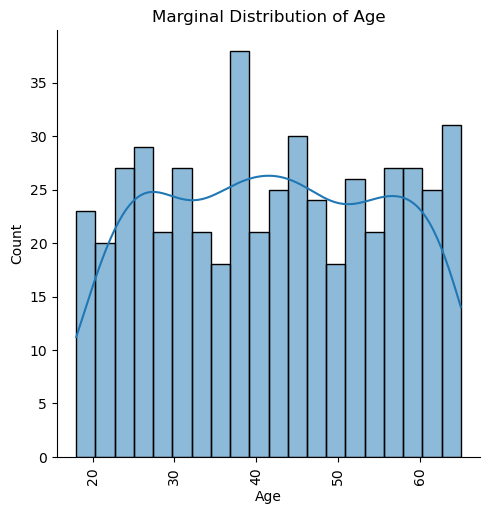

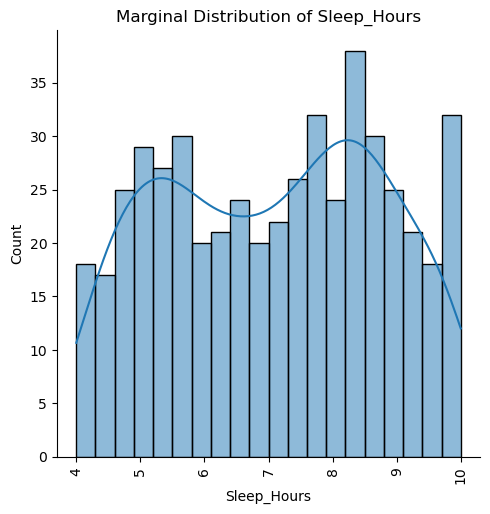

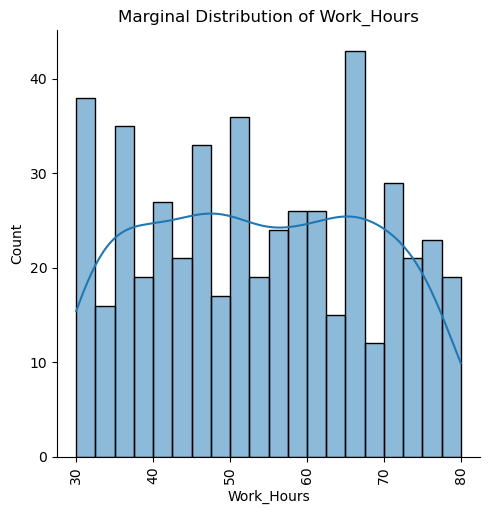

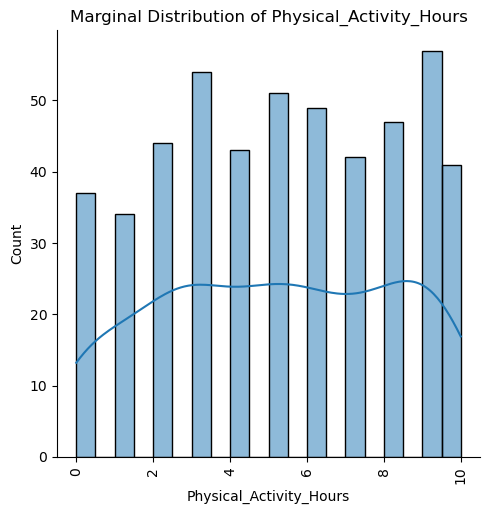

In [ ]:
for cont in cont_input_vars:
    sns.displot(data=df_copy,
                x=cont,
                kind='hist',
                bins=20,
                kde=True)
    plt.xticks(rotation=90)
    plt.title(f'Marginal Distribution of {cont}')
    plt.show()

### Marginal Distributions Categorical Variables: Bar Charts
* The bar charts show the distribution of counts for several categorical variables, providing insight into the composition of the dataset. For Gender, there is a fairly balanced representation across categories, including “Non-binary,” “Male,” “Female,” and “Prefer not to say.” Occupation is also diverse, with “Healthcare” having the highest count among the categories. The Country variable shows relatively even representation among countries like Canada, USA, Australia, UK, Germany, India, and “Other.” In terms of Severity, “Low” has the highest count, followed closely by “Medium” and “High.” Consultation_History has a balanced split between “Yes” and “No” responses, while Stress_Level shows a slightly higher count for “Medium” compared to “Low” and “High.” These visualizations indicate a diverse sample across these demographic and lifestyle categories, which could be beneficial for capturing varied perspectives in the analysis.

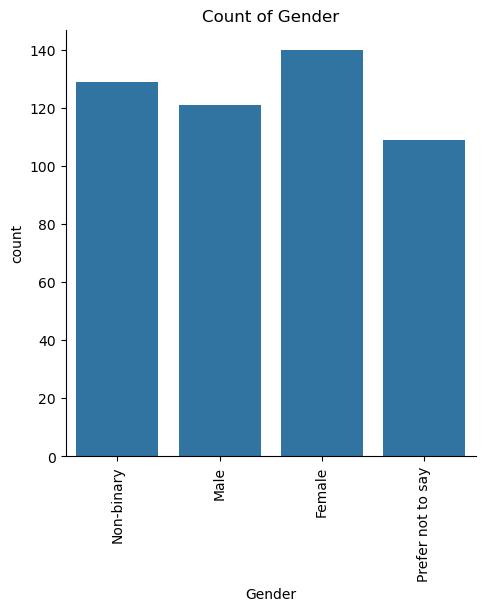

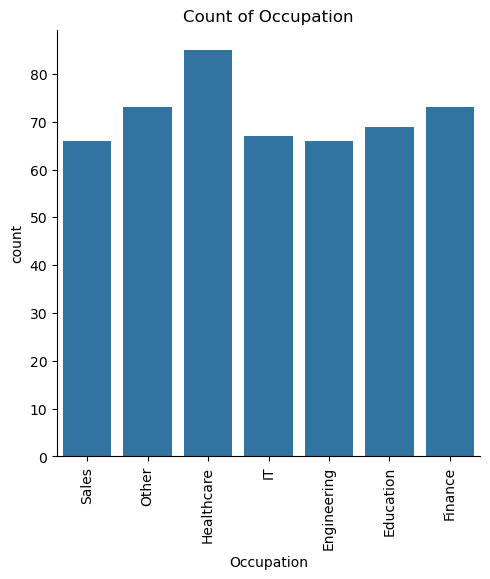

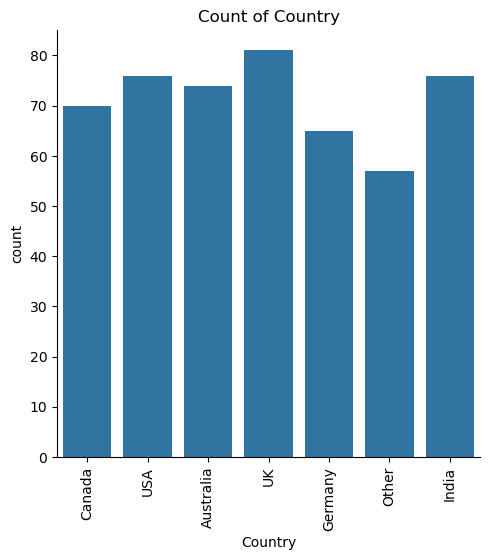

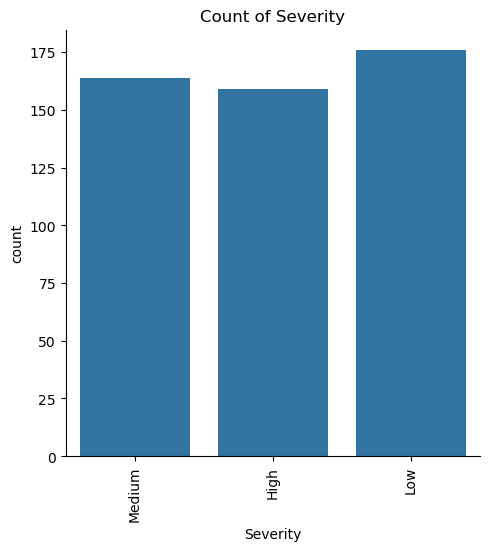

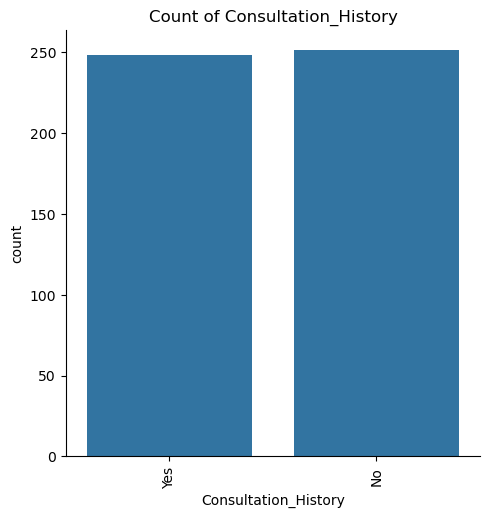

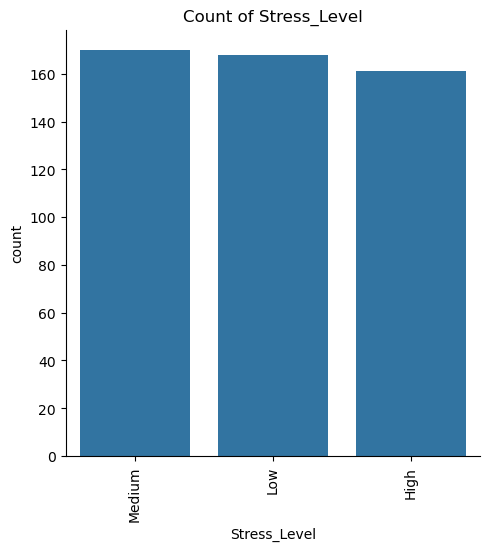

In [ ]:
for cat in cat_input_vars:
    sns.catplot(data=df_copy,
                x=cat,
                kind='count',
                legend=False)
    plt.xticks(rotation=90)
    plt.title(f'Count of {cat}')
    plt.show()

### Categorical-to-Categorical Relationships or Combinations: Dodged Bar Charts and Heatmaps
* The series of bar charts illustrates the relationships between Gender and other categorical variables, as well as Occupation with additional demographic factors. The first few plots show Gender distributed across Occupation, Country, Severity, Consultation_History, and Stress_Level, with each gender category displaying varied counts across occupations, countries, and health-related conditions, indicating demographic diversity. Similarly, Occupation is analyzed against Country, Severity, Consultation_History, and Stress_Level, revealing patterns in work sector representation across regions, health severity levels, prior consultation history, and stress levels. Additionally, the distribution of Consultation_History, Stress_Level, and Severity across various countries and within each other is shown. Consultation_History responses vary by country, with Australia and India showing a higher proportion of “No” responses. Stress_Level by country demonstrates differences, with “Medium” stress frequently reported in the UK and USA, while “Low” and “High” stress levels are more evenly represented elsewhere. The Severity by Consultation_History chart indicates that individuals with “Low” severity are more likely to lack a consultation history, and Stress_Level versus Consultation_History shows an even distribution across all levels, suggesting a balanced variation in stress regardless of consultation history. These charts highlight distribution and interaction patterns within the dataset, potentially useful for understanding demographic and occupational impacts on health and stress factors, and showcase interconnectedness across different demographics and health-related characteristics.
* The heatmaps provide insights into the relationships between Gender, Occupation, Country, Severity, Consultation_History, and Stress_Level within the dataset. The first series of heatmaps illustrates how Gender interacts with other variables, showing the distribution of individuals across Occupations, Countries, Severity levels, Consultation History, and Stress Levels. For instance, certain gender groups have higher counts in specific occupations and severity levels, reflecting demographic and health-related differences. Similarly, another series explores the relationships between Occupation and factors like Country, Severity, Consultation History, and Stress Level, revealing occupational patterns across regions and health factors. For example, healthcare workers show a higher representation across various severity levels, while certain occupations, like engineering, have distinct stress level distributions. Finally, the Country versus Severity heatmap highlights how severity levels vary among countries, with the UK and USA showing notable patterns in severity distribution. Together, these heatmaps underscore the interconnectedness of demographic, occupational, and health characteristics across the population.

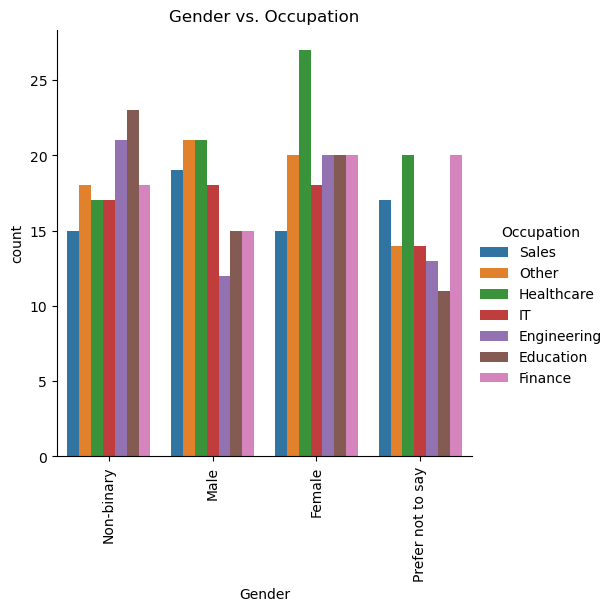

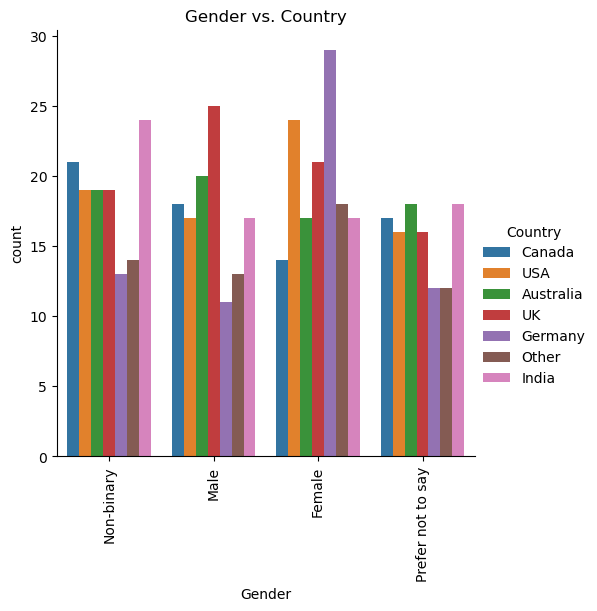

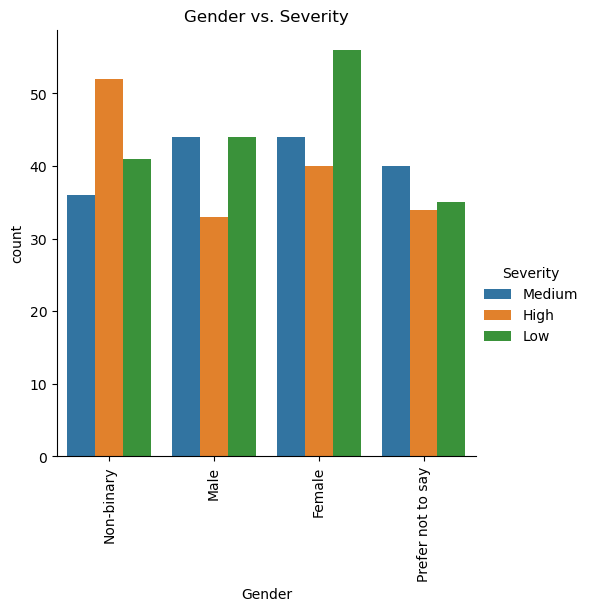

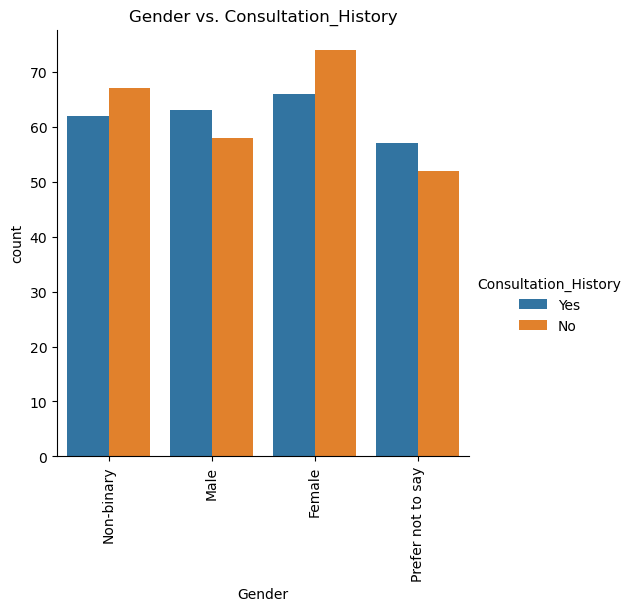

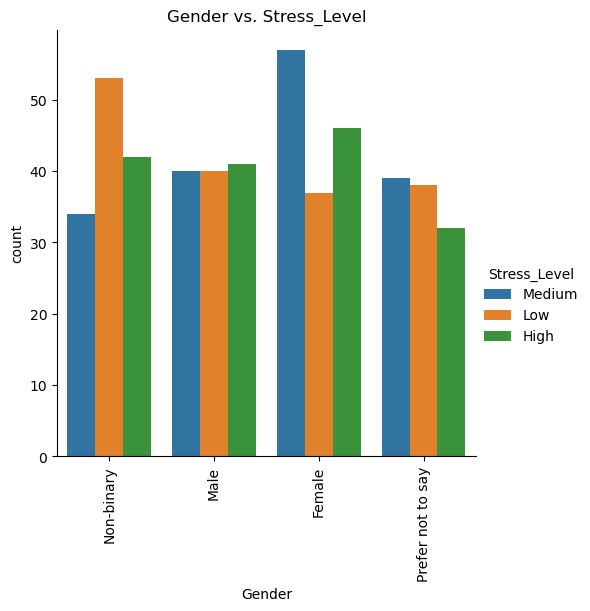

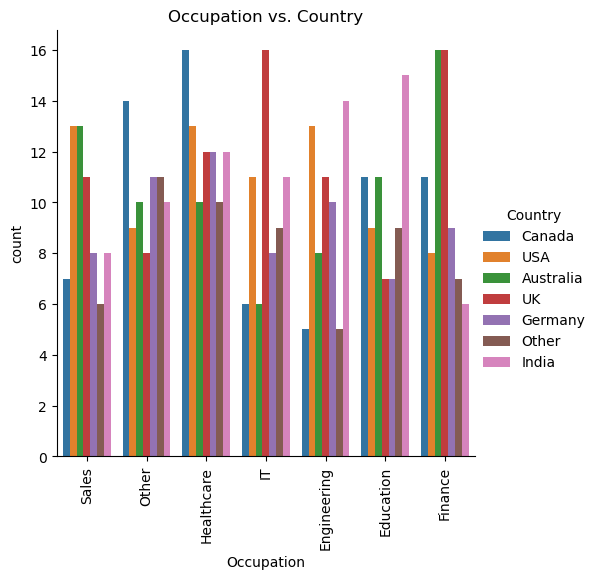

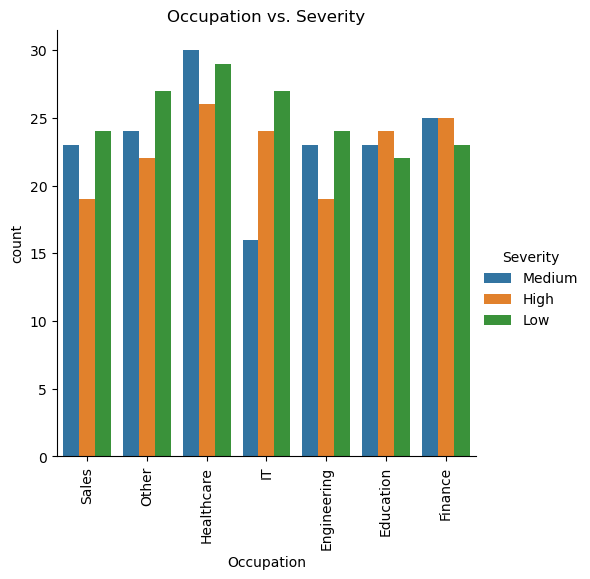

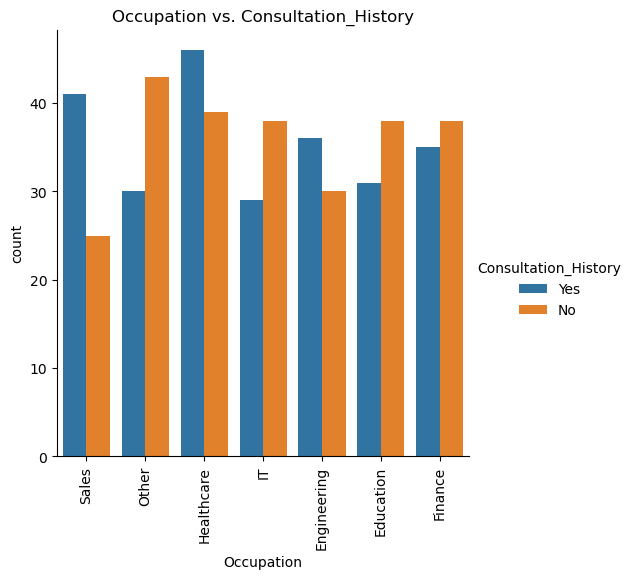

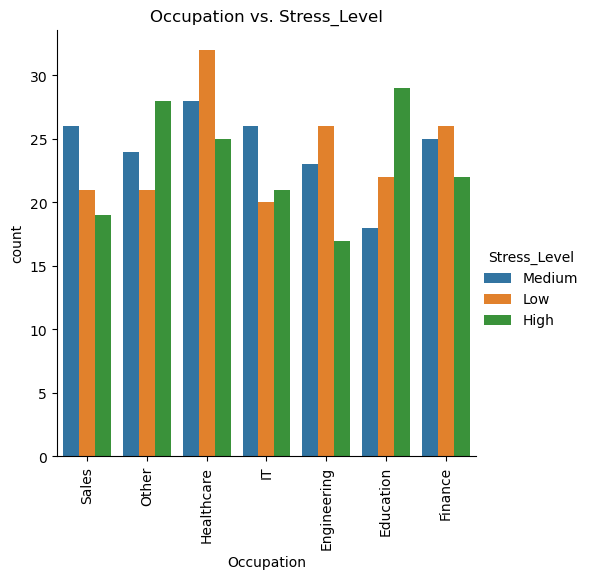

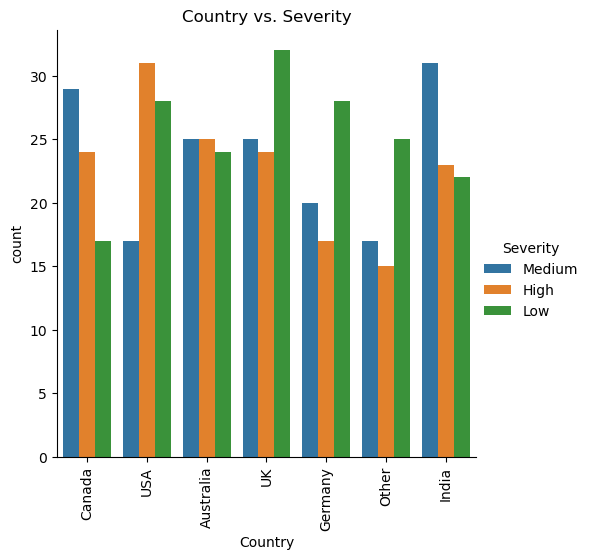

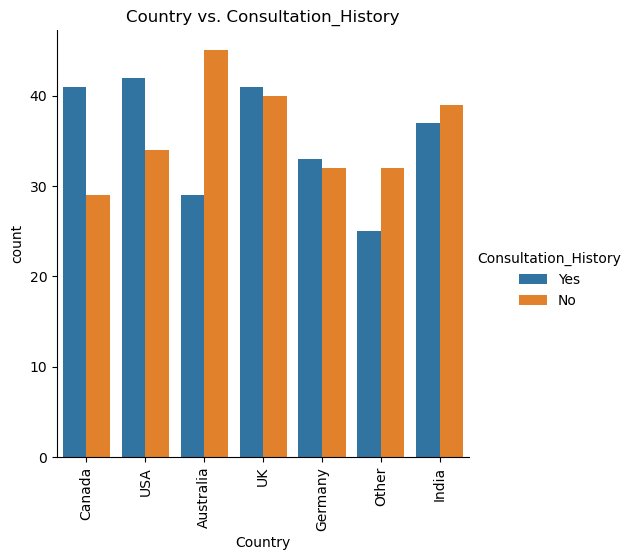

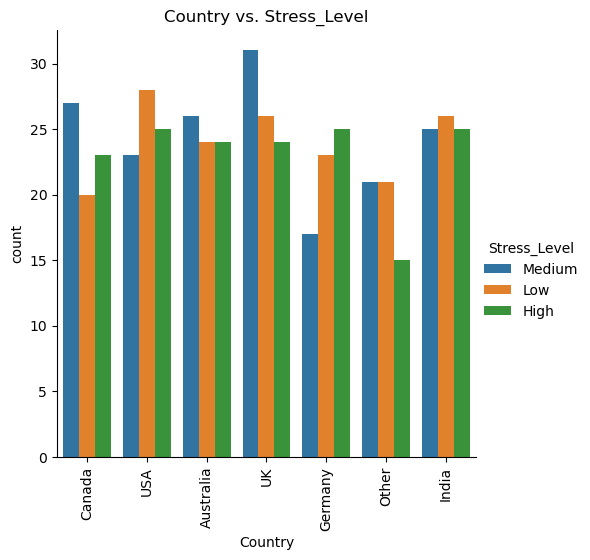

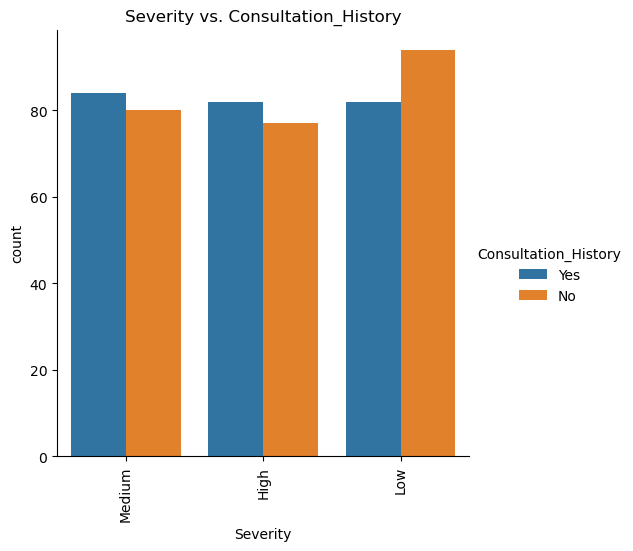

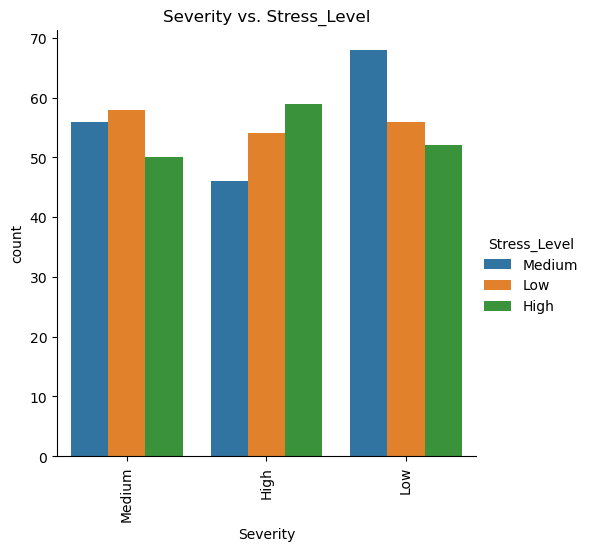

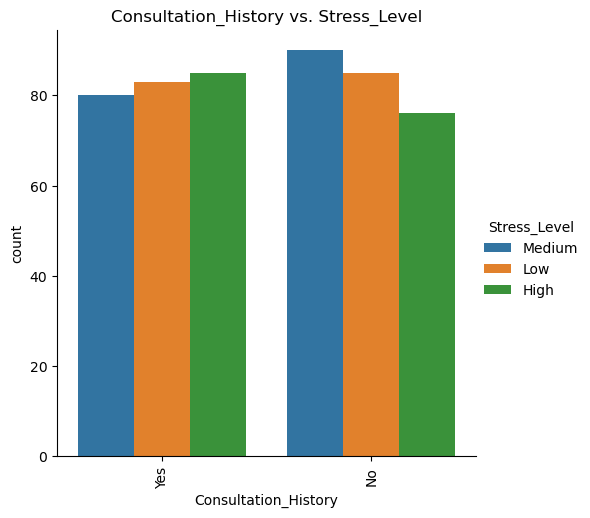

In [ ]:
pairwise_comparisons = list(itertools.combinations(cat_input_vars, 2))
for cat1, cat2 in pairwise_comparisons:
    sns.catplot(data=df_copy,
                x=cat1,
                hue=cat2,
                kind='count')
    plt.title(f'{cat1} vs. {cat2}')
    plt.xticks(rotation=90)
    plt.show()

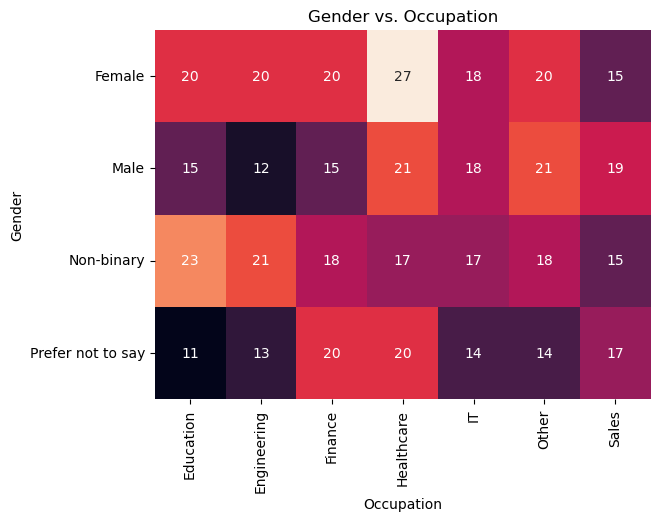

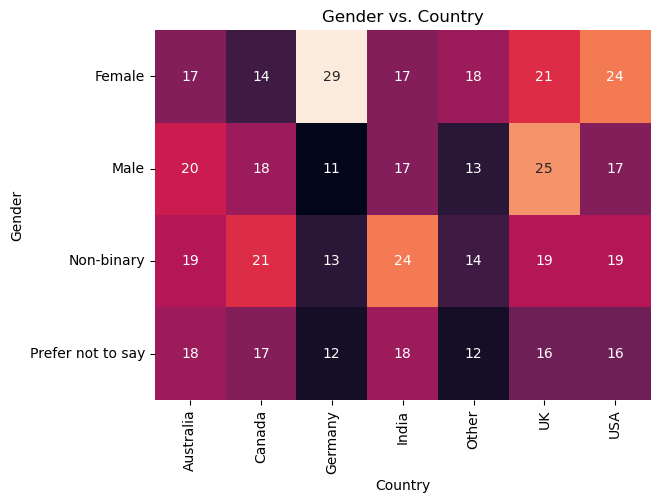

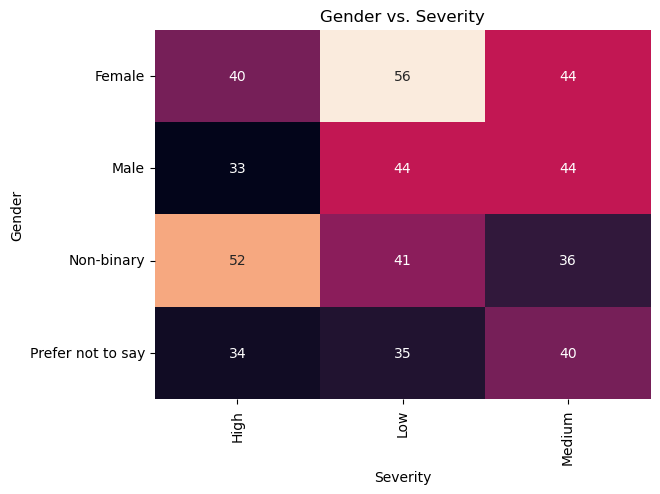

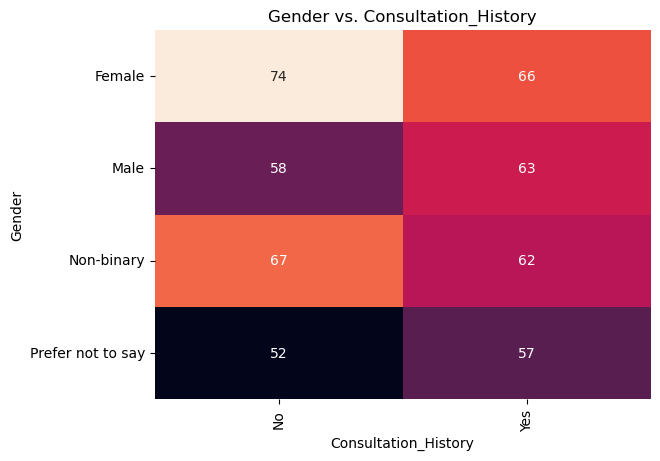

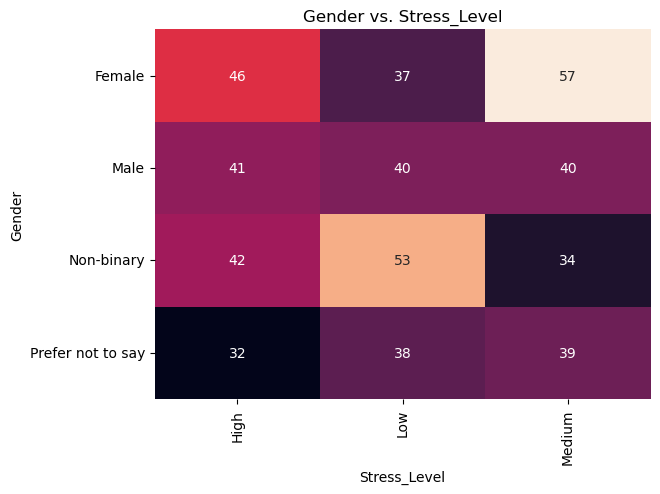

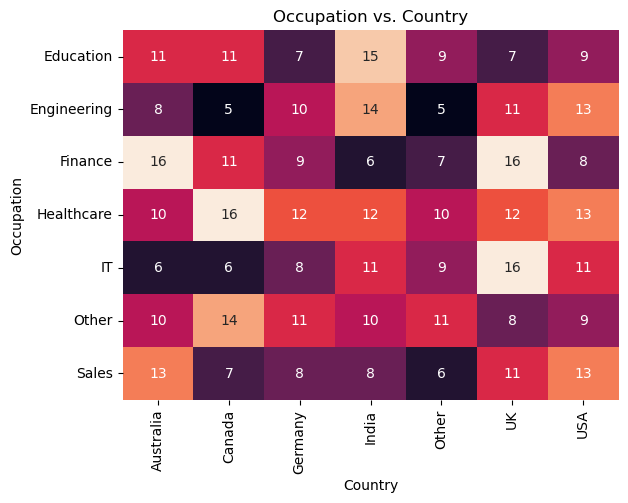

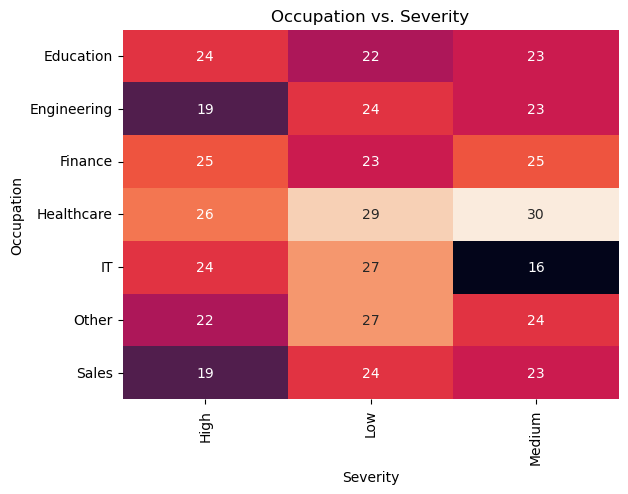

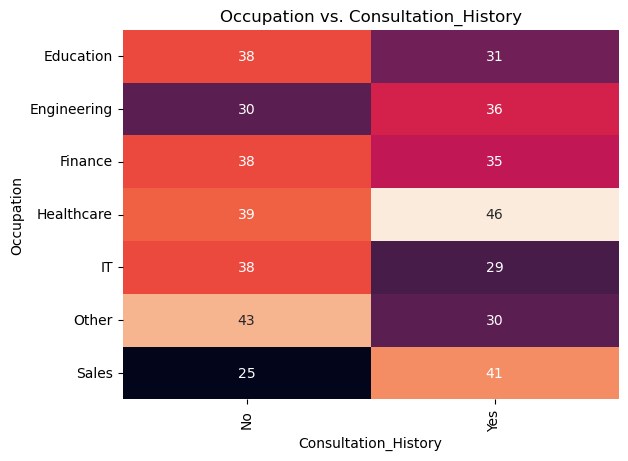

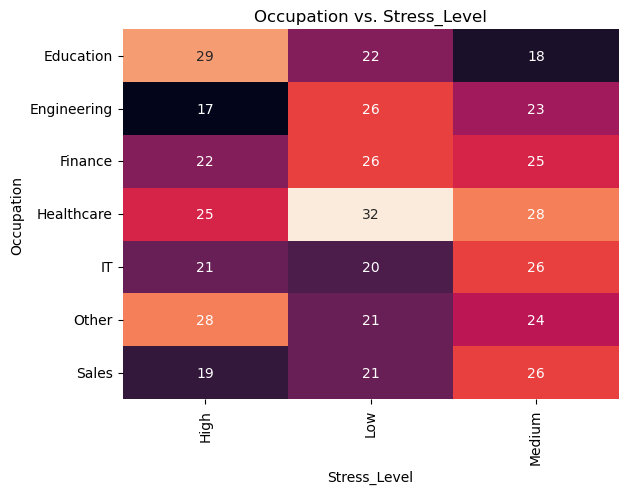

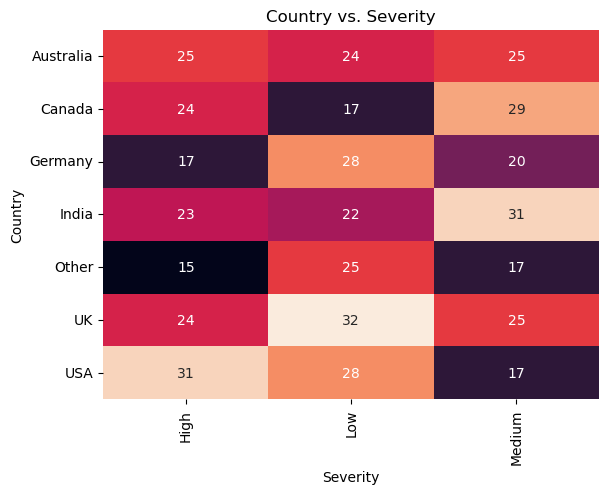

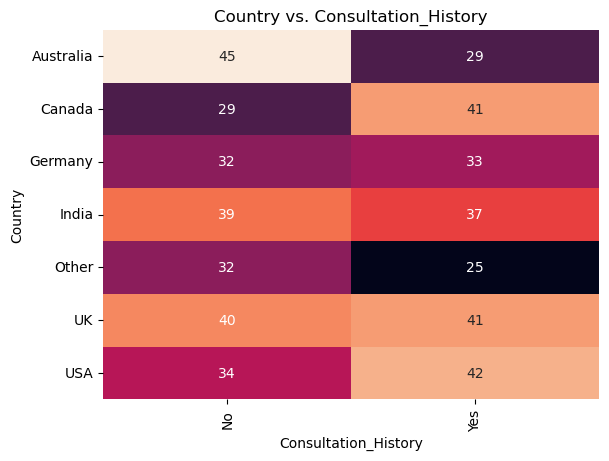

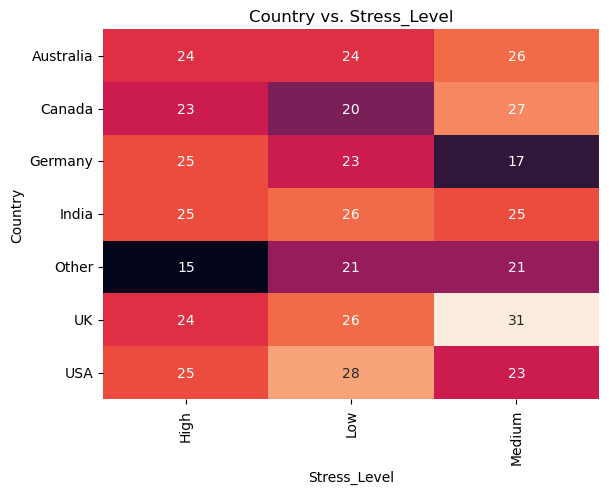

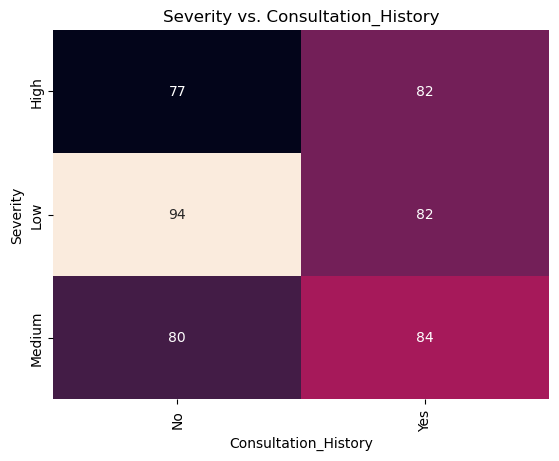

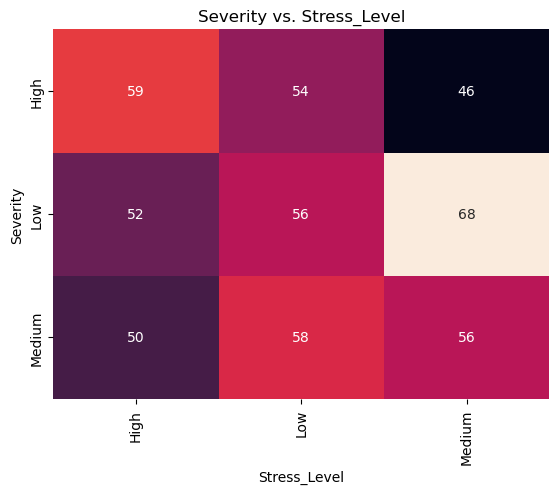

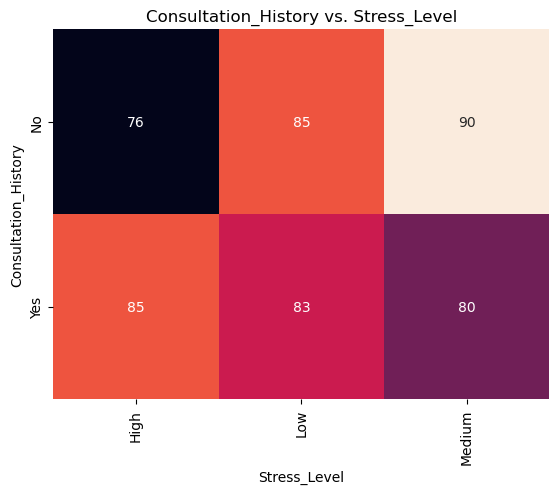

In [ ]:
pairwise_comparisons = list(itertools.combinations(cat_input_vars, 2))
for cat1, cat2 in pairwise_comparisons:
    crosstab = pd.crosstab(df_copy[cat1], df[cat2])
    plt.figure()
    sns.heatmap(crosstab,
                annot=True,
                annot_kws={'size': 10},
                fmt='d',
                cbar=False)
    plt.title(f'{cat1} vs. {cat2}')
    plt.xticks(rotation=90)
    plt.show()

### Categorical-to-Continuous Relationships or Conditional Distributions: Box Plots, Violin Plots and Point Plots
* The series of plots illustrates relationships between continuous variables like Age, Sleep Hours, Work Hours, and Physical Activity Hours against categorical variables such as Gender, Occupation, and Country. Across all comparisons, the distributions show a similar range and median values without clear differentiation by category. For instance, age distributions are fairly consistent across genders and occupations, with no significant outliers or shifts in medians. Sleep hours and work hours also exhibit similar medians and interquartile ranges across different gender identities, occupations, and countries. This pattern is consistent in physical activity hours as well, where each categorical variable grouping displays overlapping ranges and medians. Overall, these box plots reveal that there are no substantial variations in these continuous measures based on gender, occupation, or country, indicating uniformity within the dataset for these aspects.

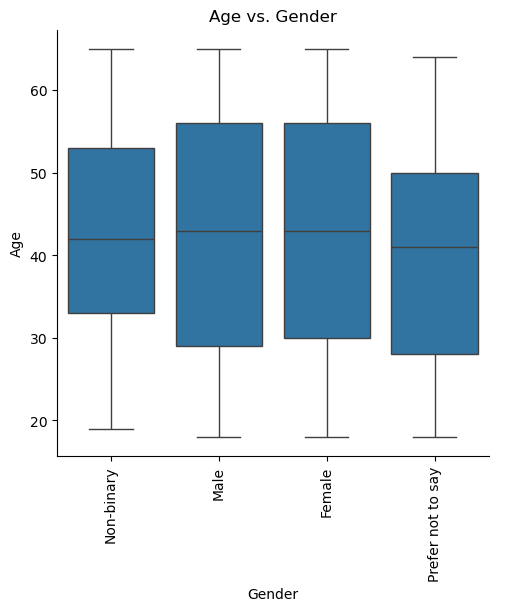

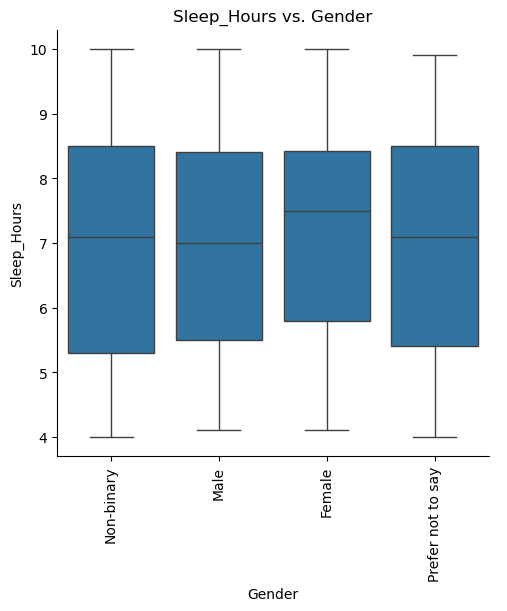

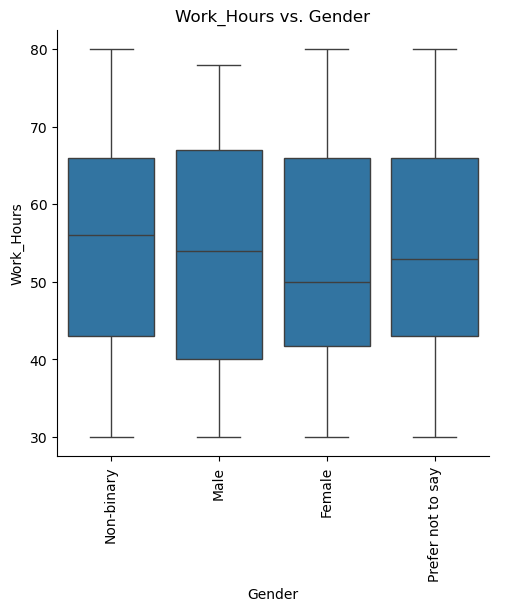

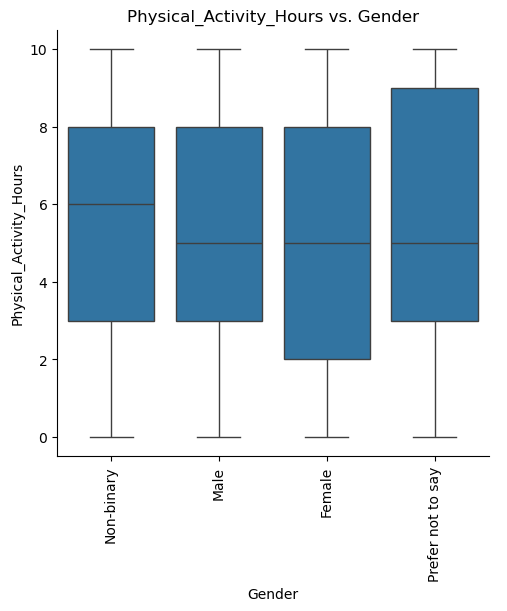

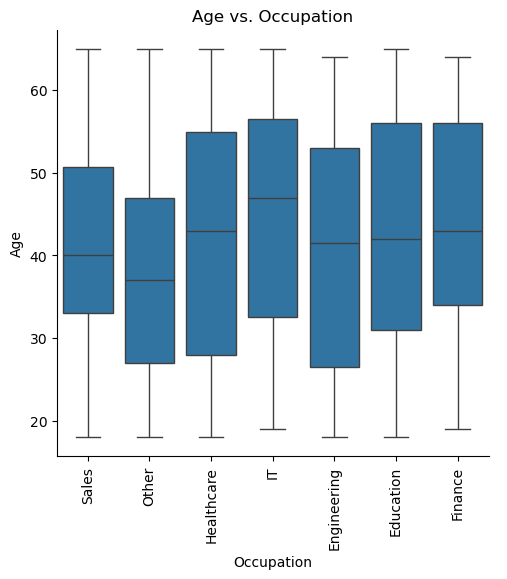

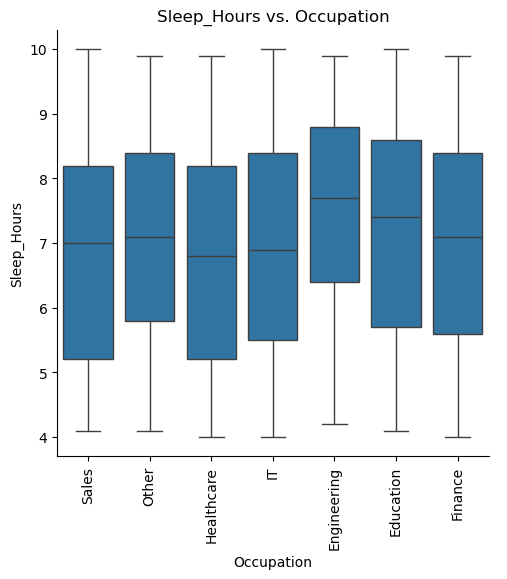

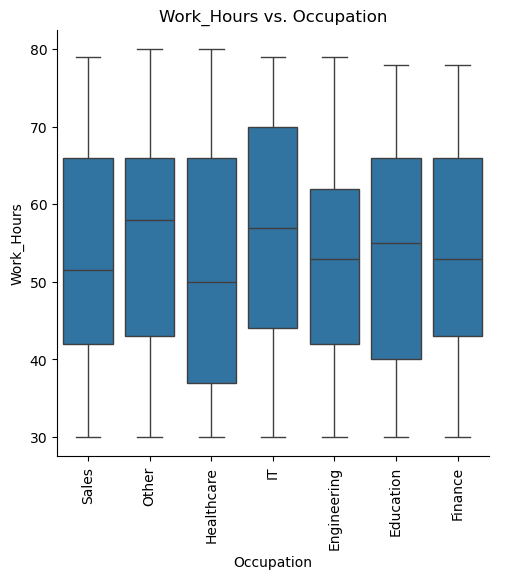

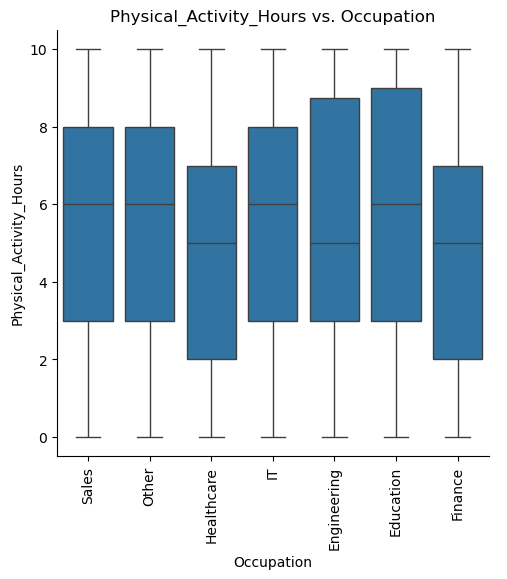

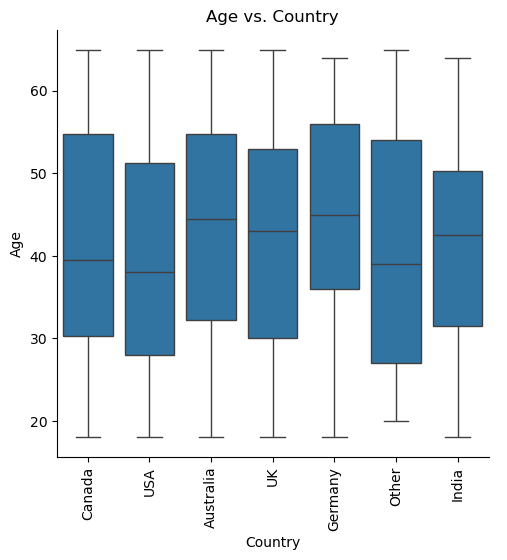

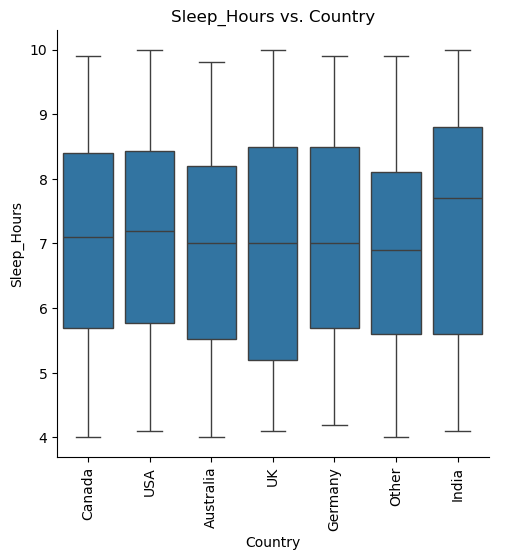

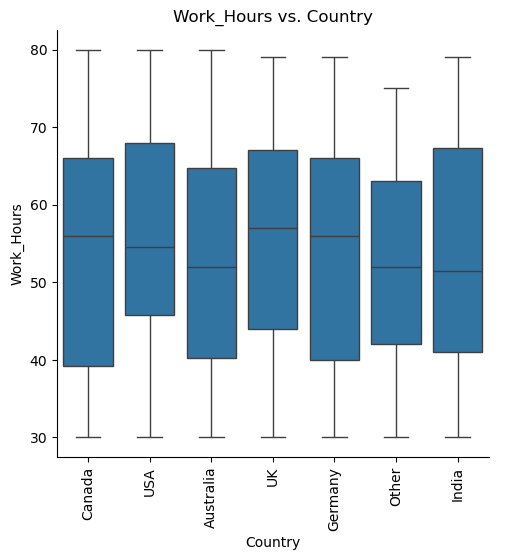

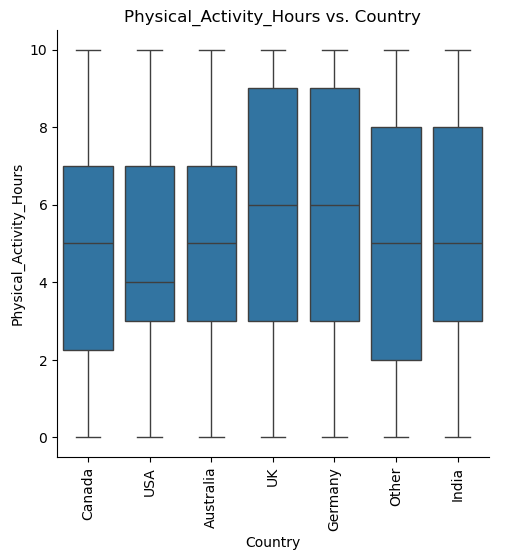

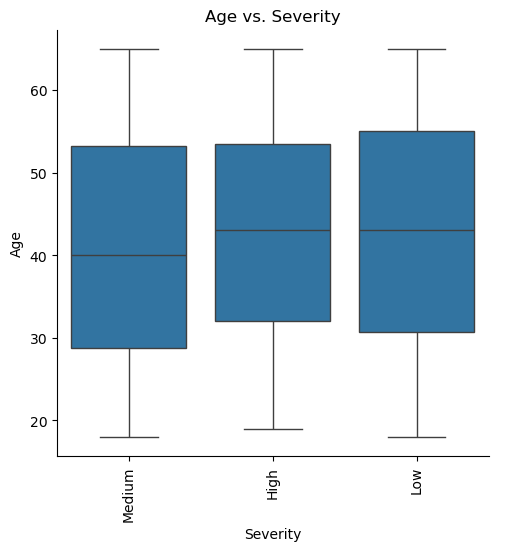

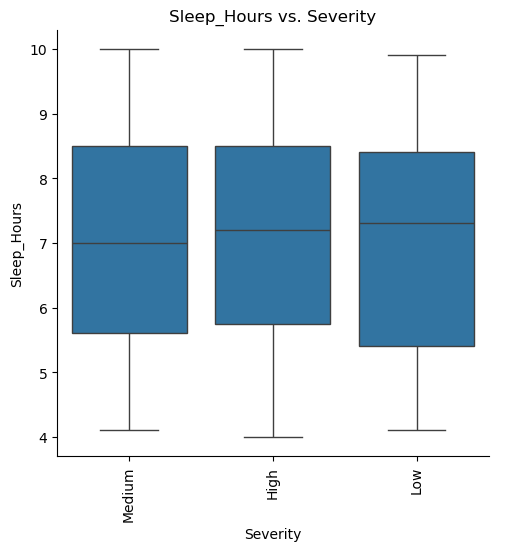

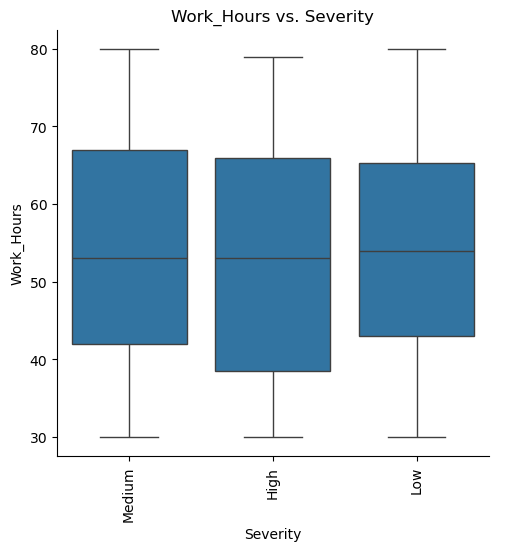

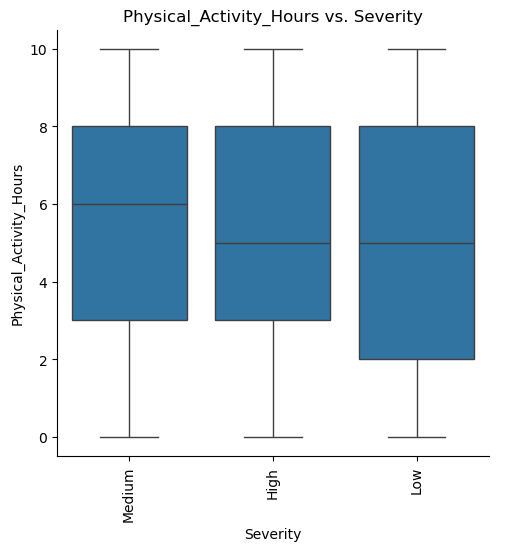

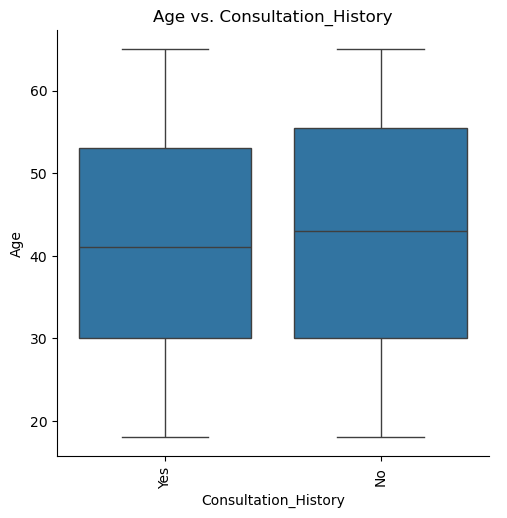

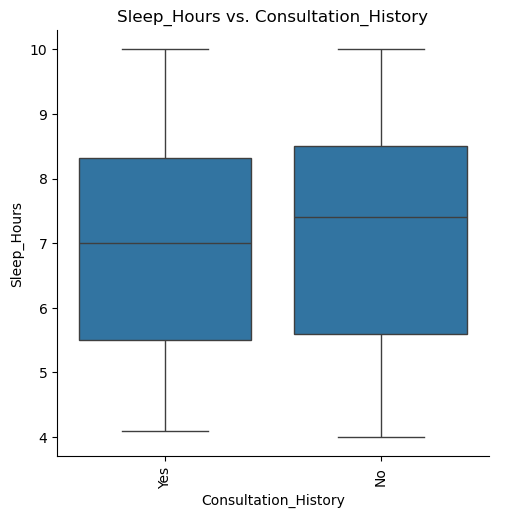

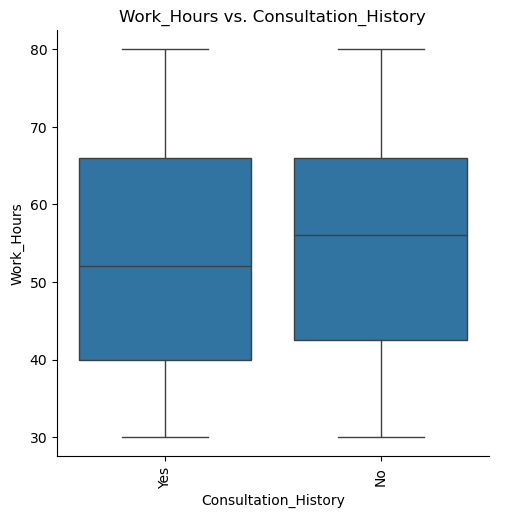

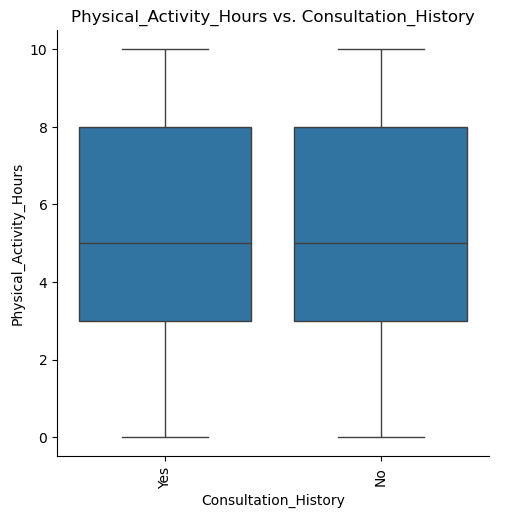

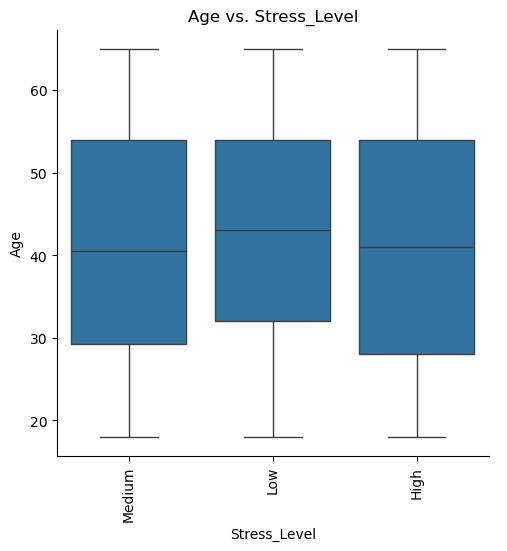

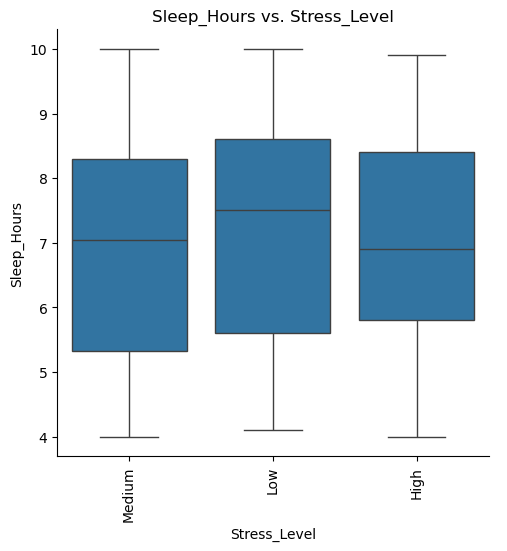

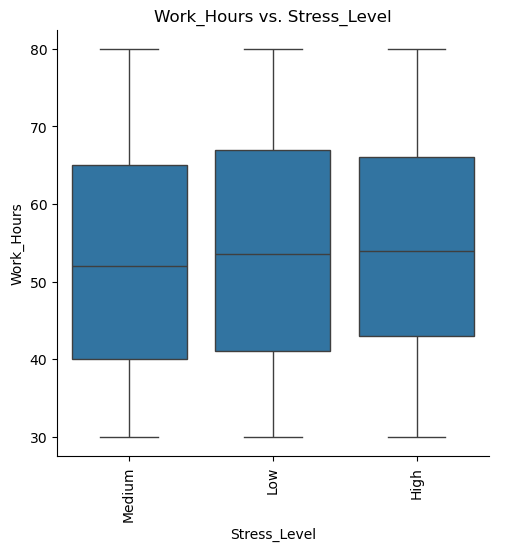

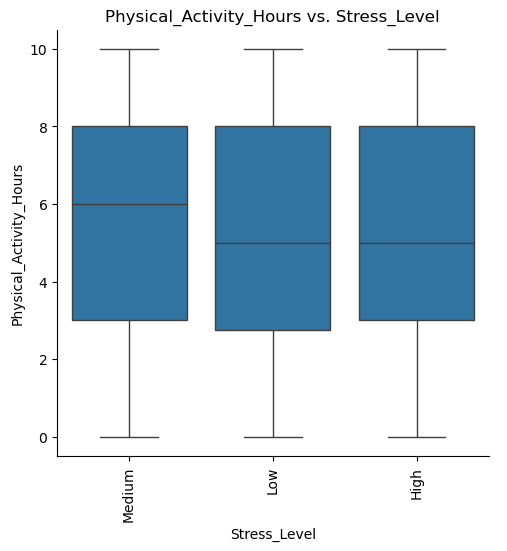

In [ ]:
for cat_input_var in cat_input_vars:
    for cont_input_var in cont_input_vars:
        sns.catplot(data=df_copy,
                    x=cat_input_var,
                    y=cont_input_var,
                    kind='box')
        plt.title(f'{cont_input_var} vs. {cat_input_var}')
        plt.xticks(rotation=90)
        plt.show()

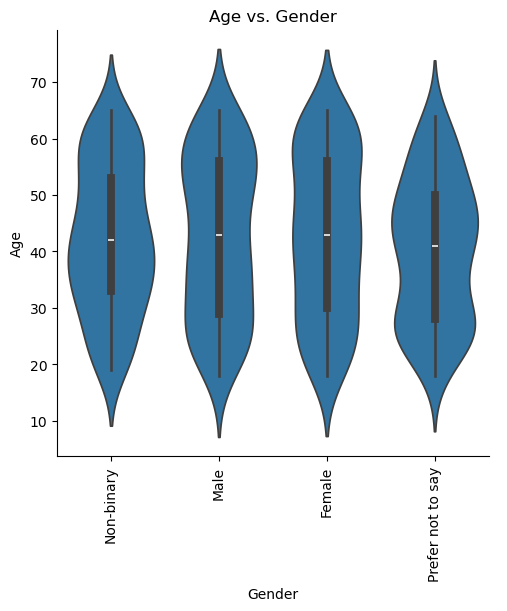

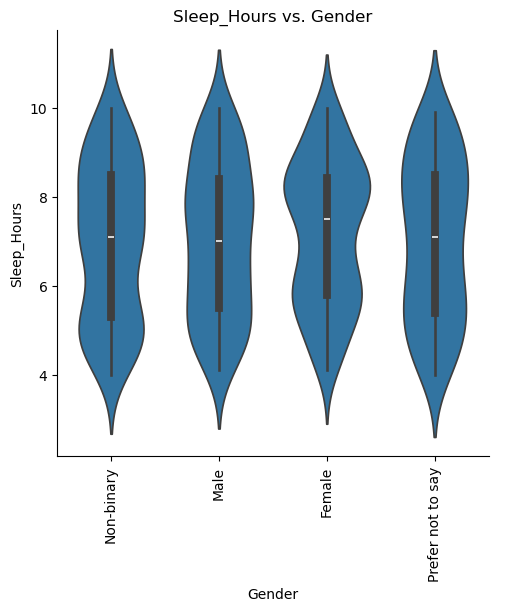

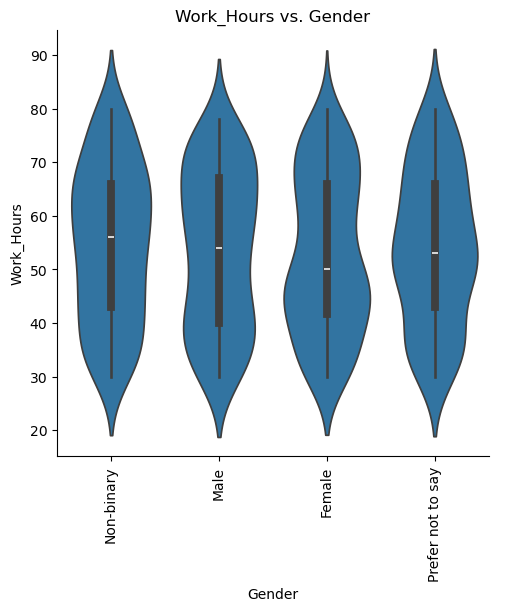

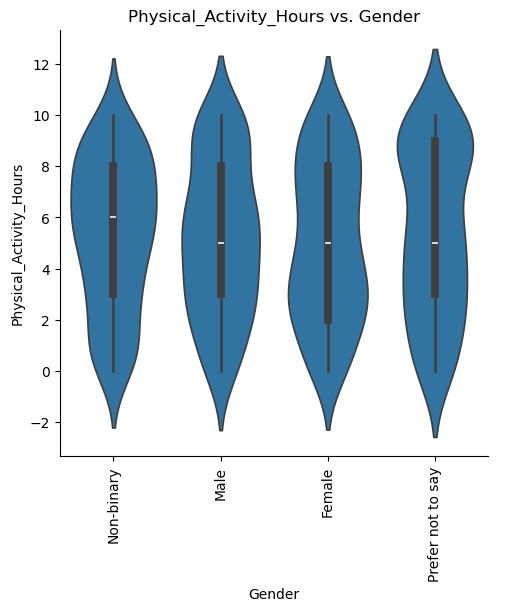

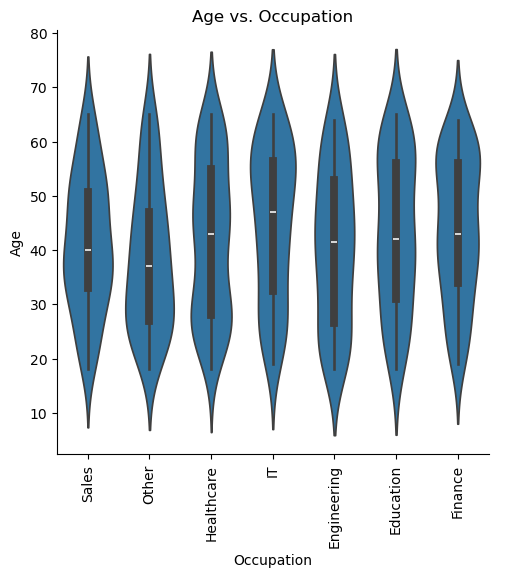

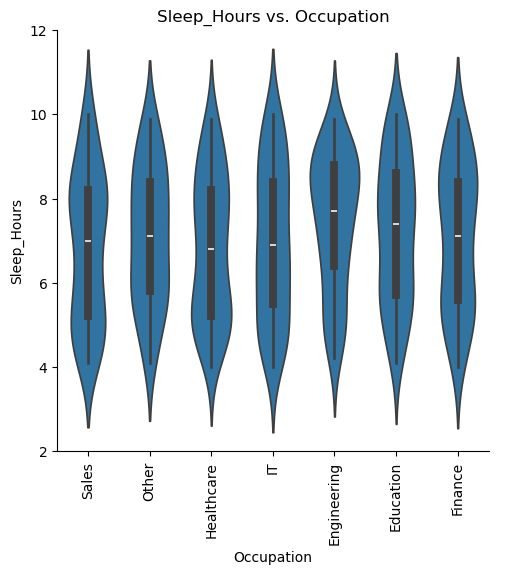

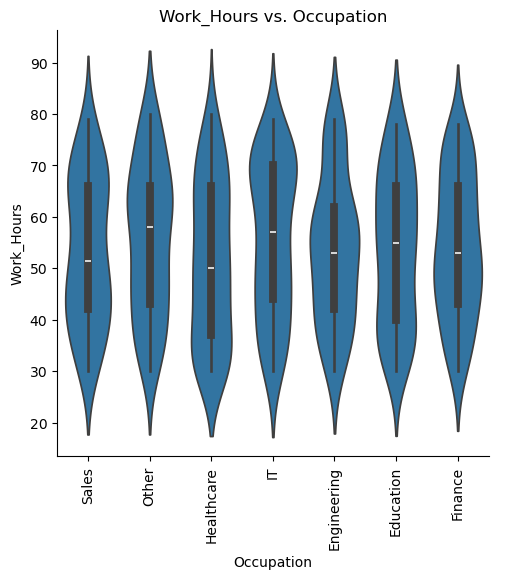

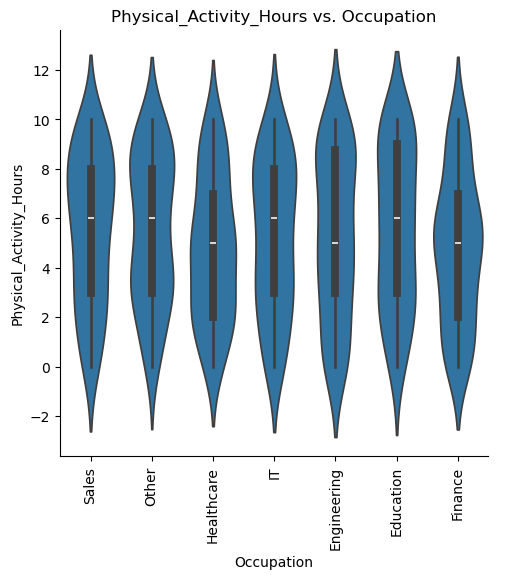

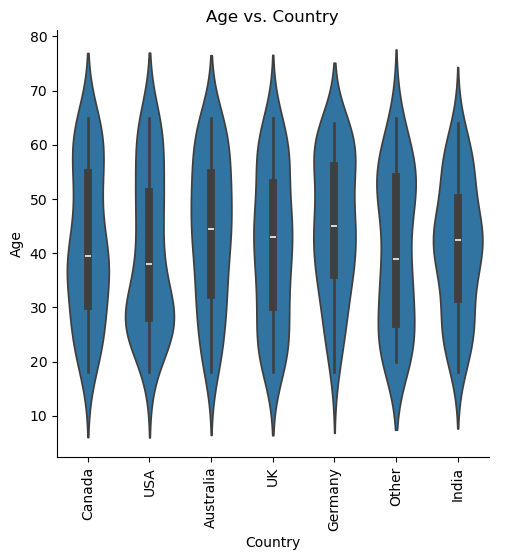

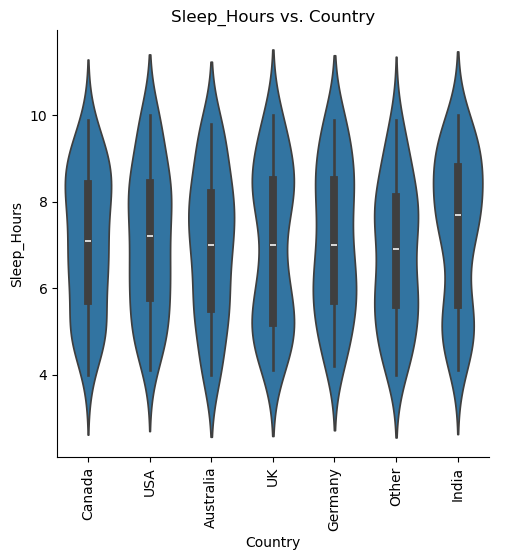

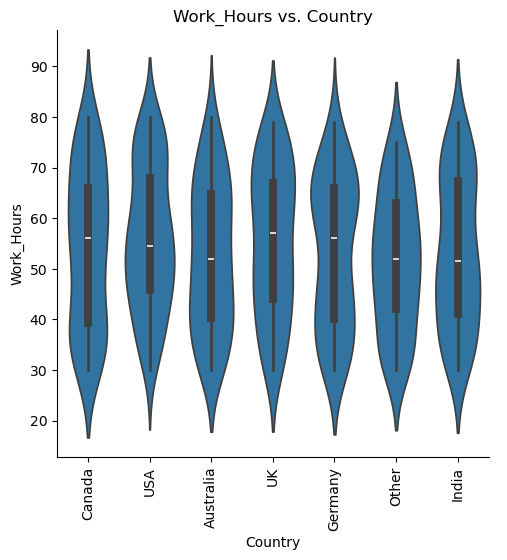

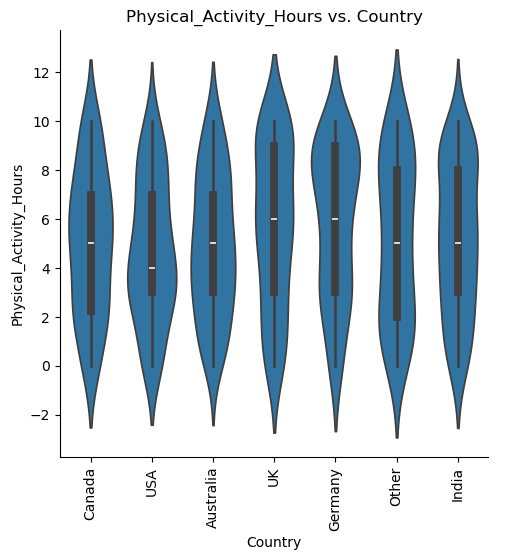

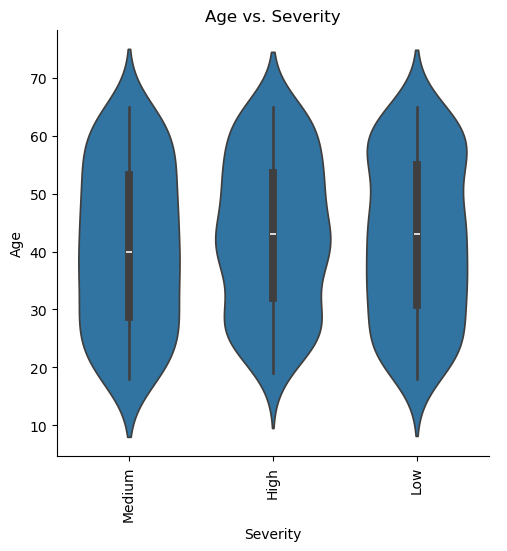

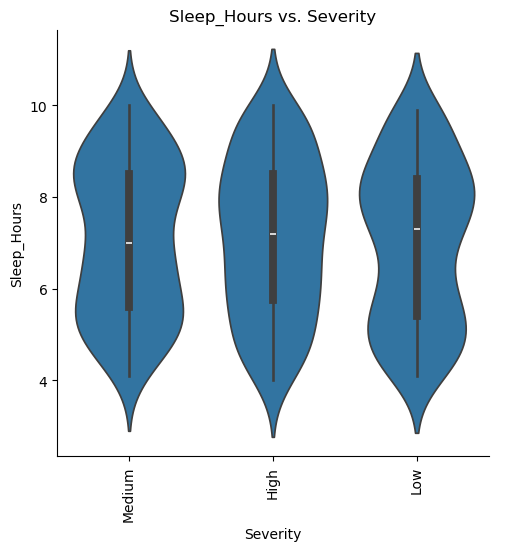

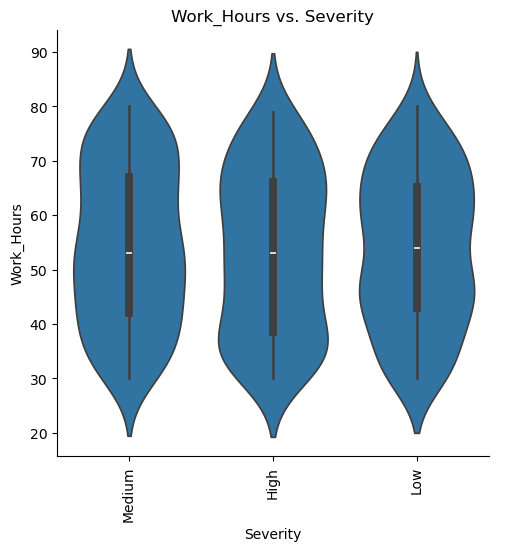

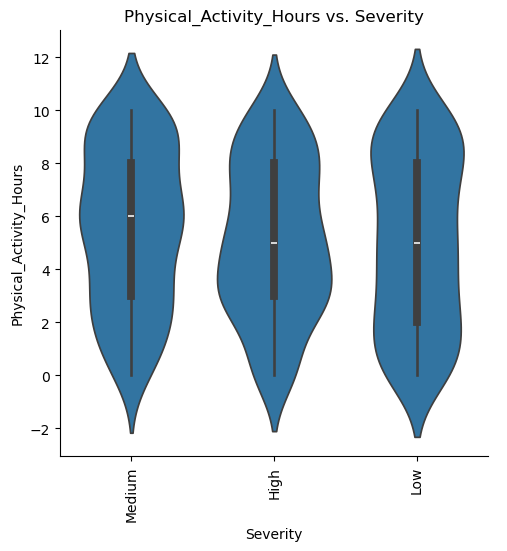

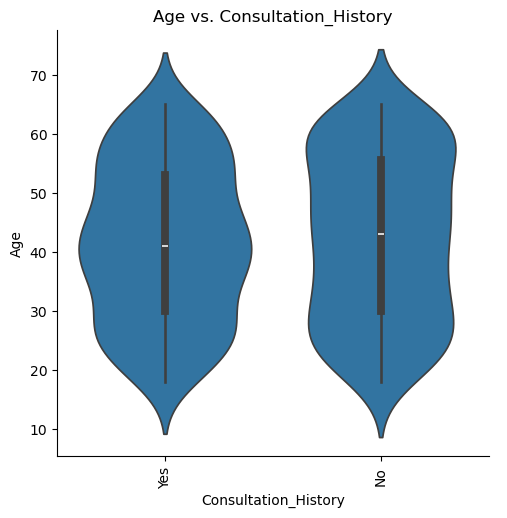

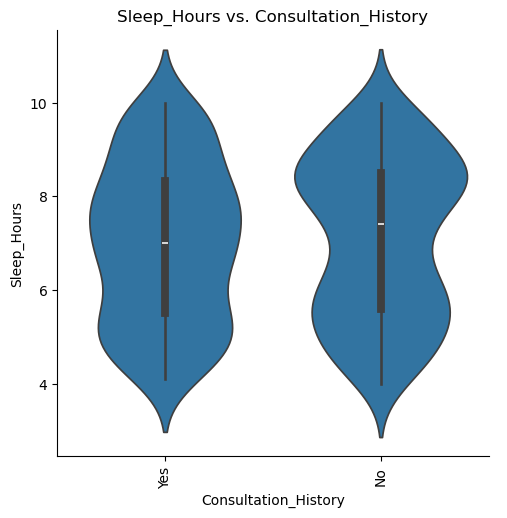

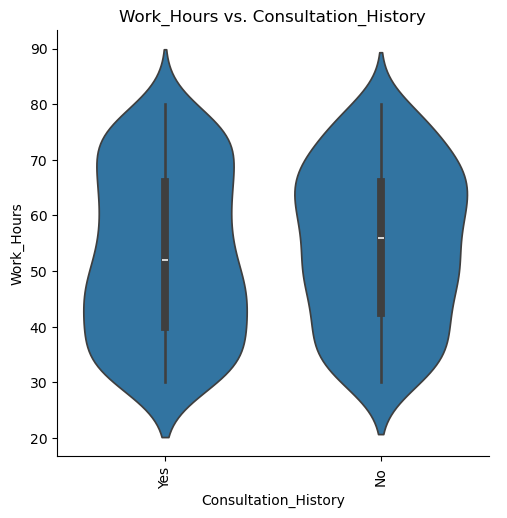

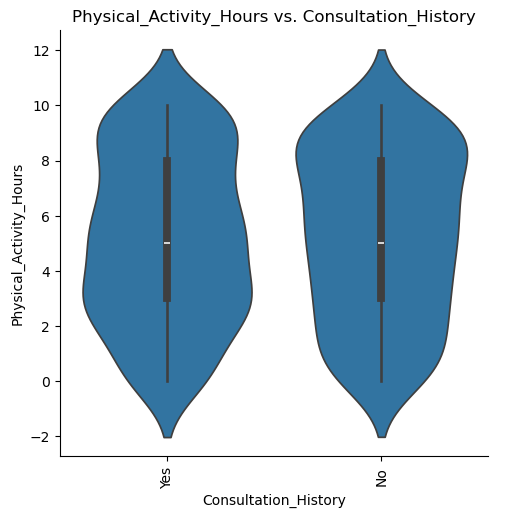

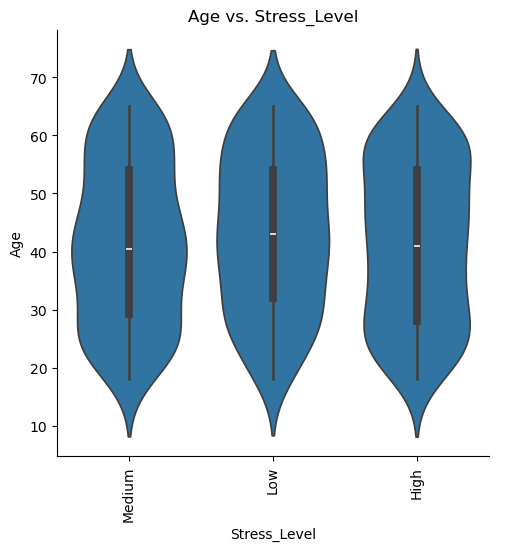

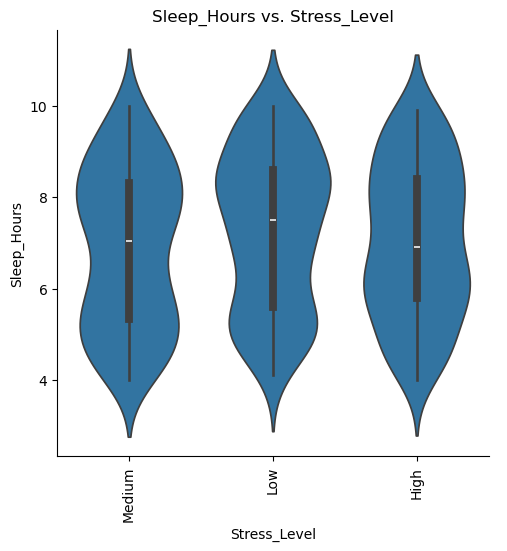

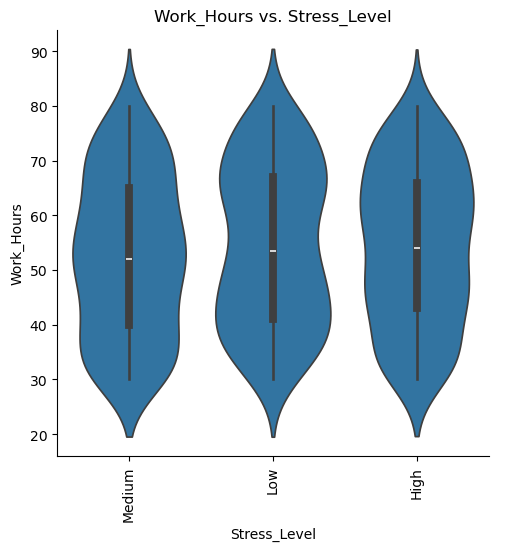

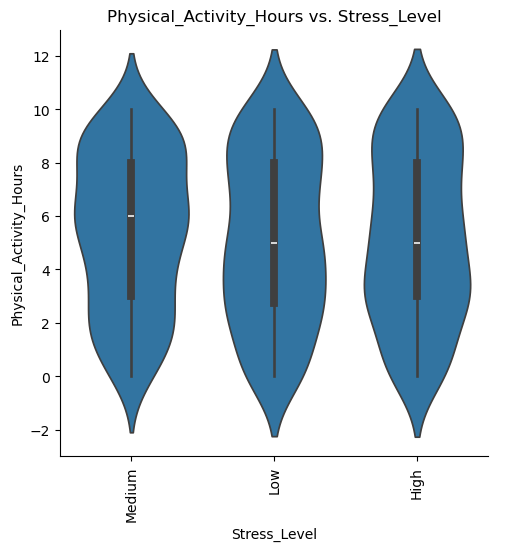

In [ ]:
for cat_input_var in cat_input_vars:
    for cont_input_var in cont_input_vars:
        sns.catplot(data=df_copy,
                    x=cat_input_var,
                    y=cont_input_var,
                    kind='violin')
        plt.title(f'{cont_input_var} vs. {cat_input_var}')
        plt.xticks(rotation=90)
        plt.show()

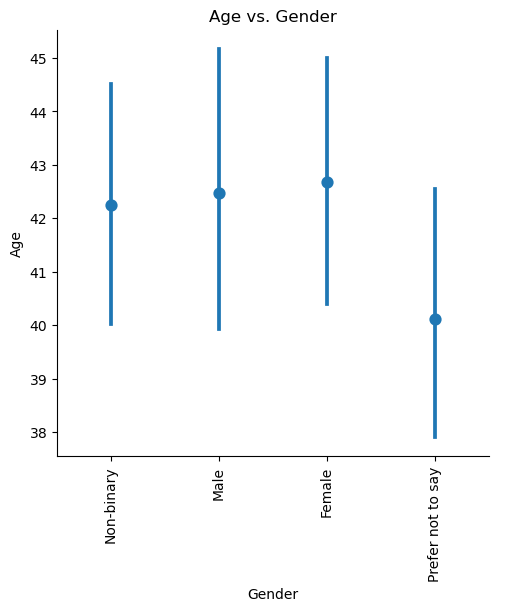

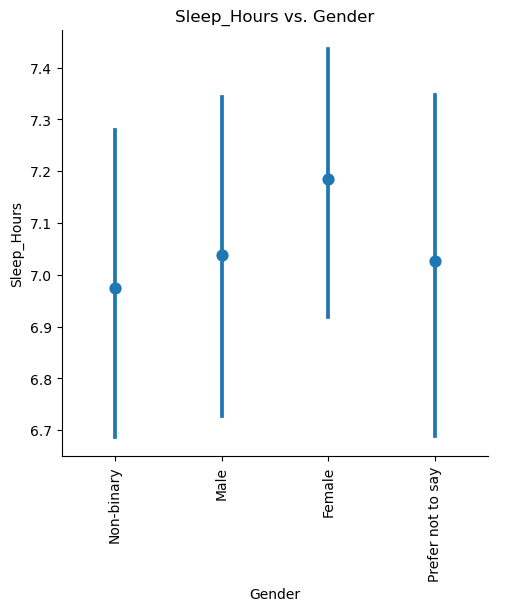

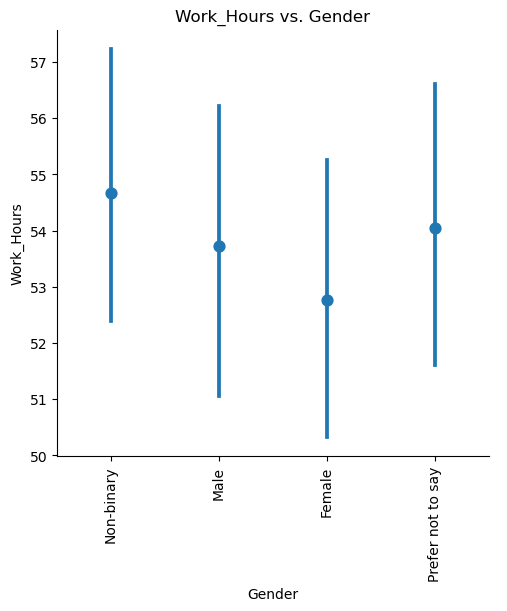

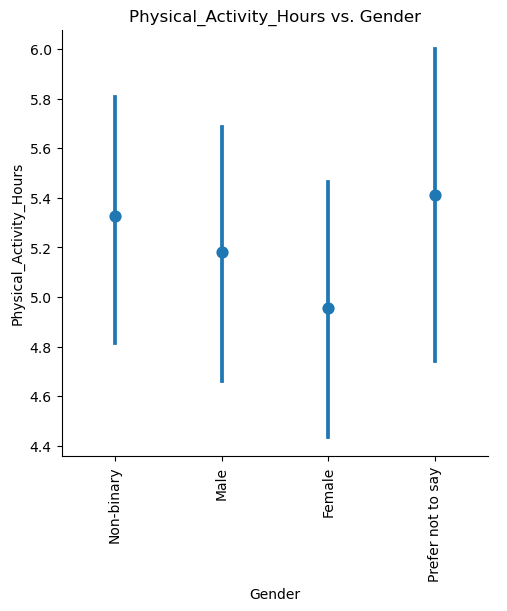

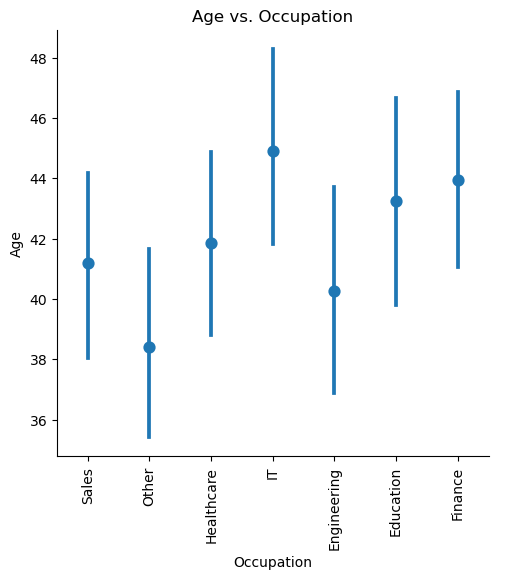

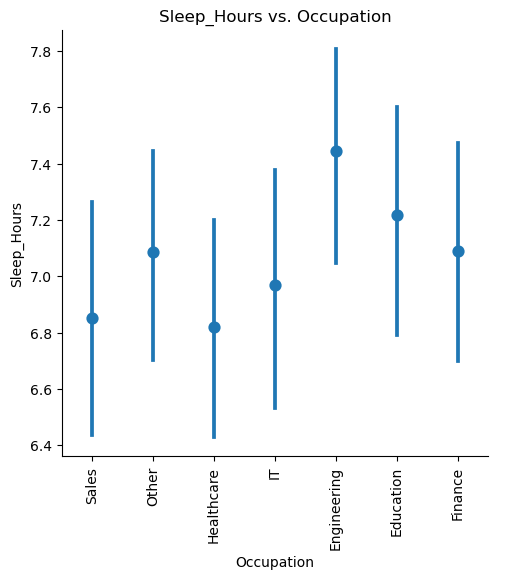

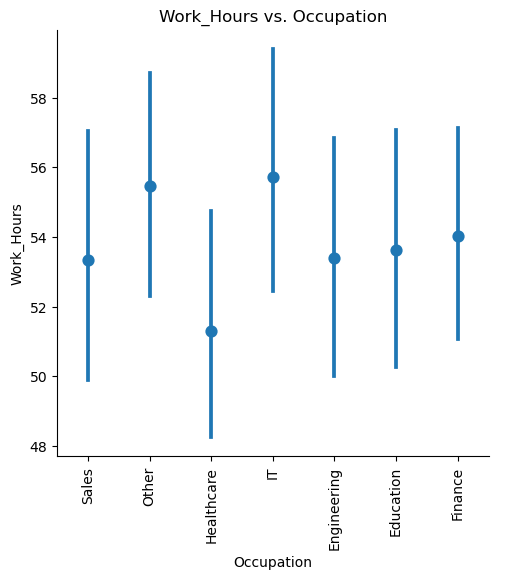

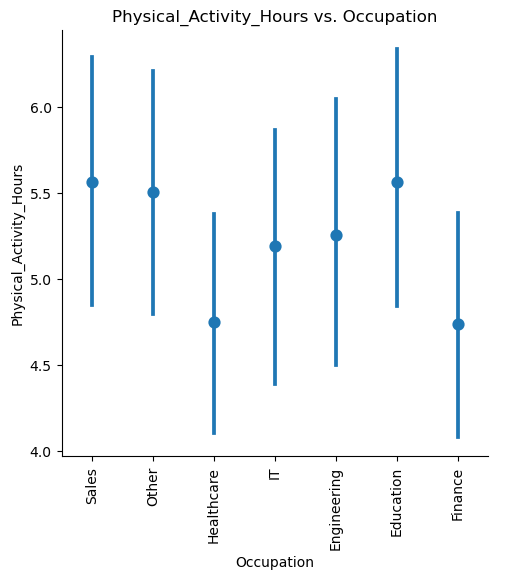

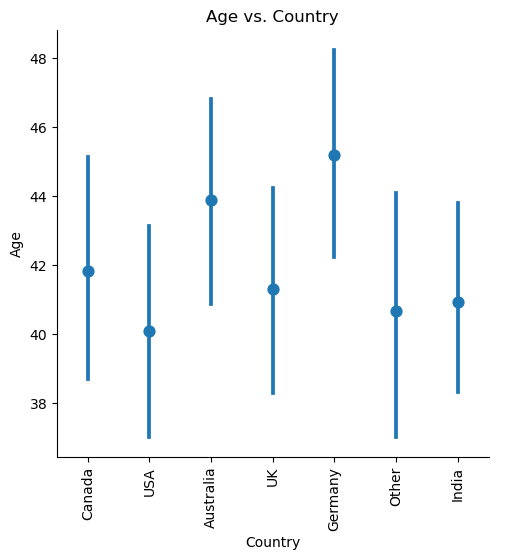

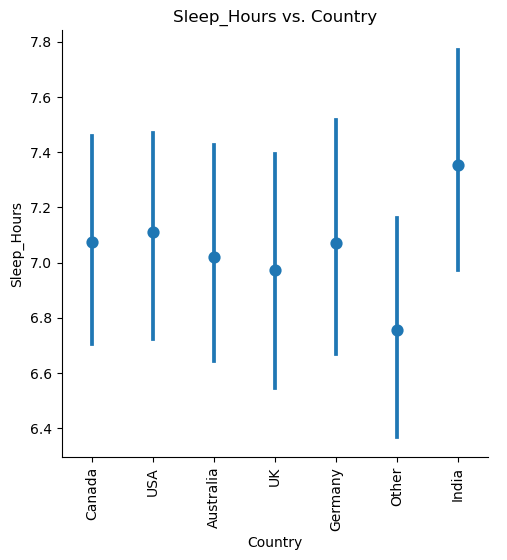

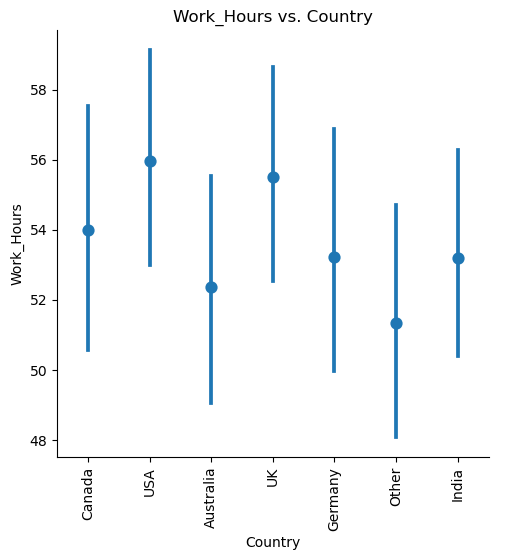

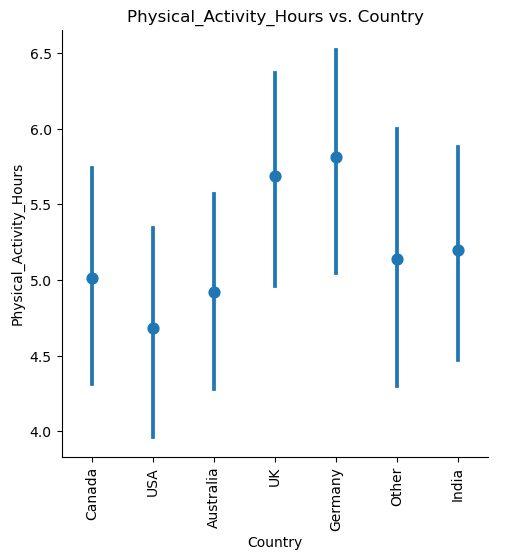

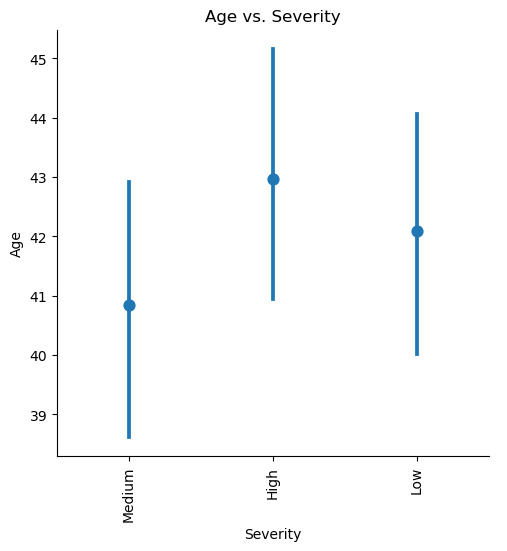

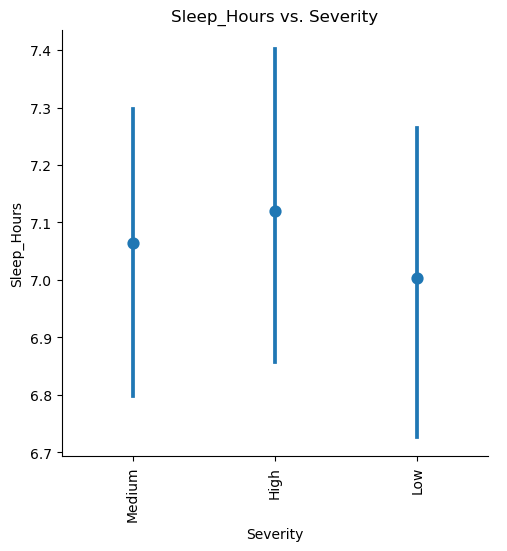

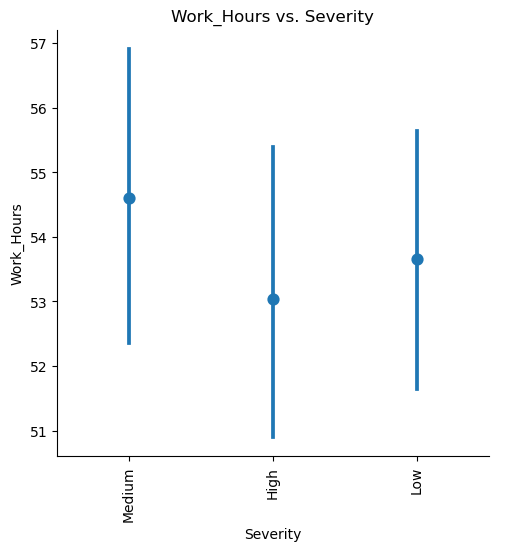

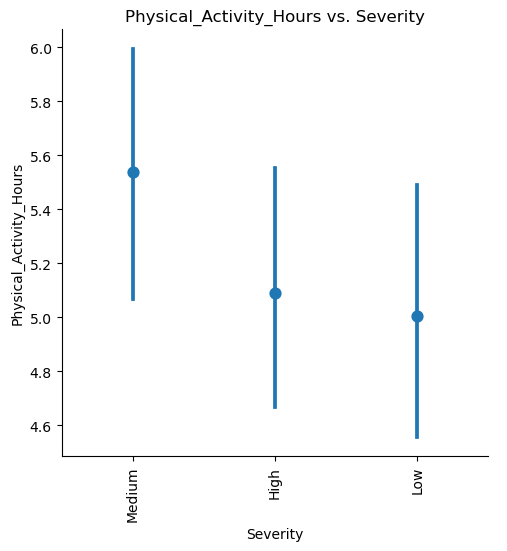

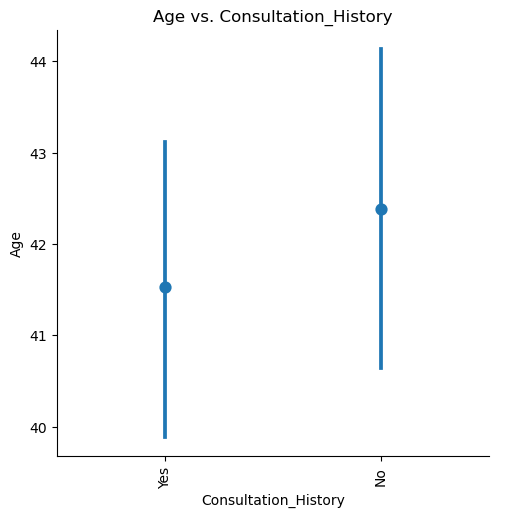

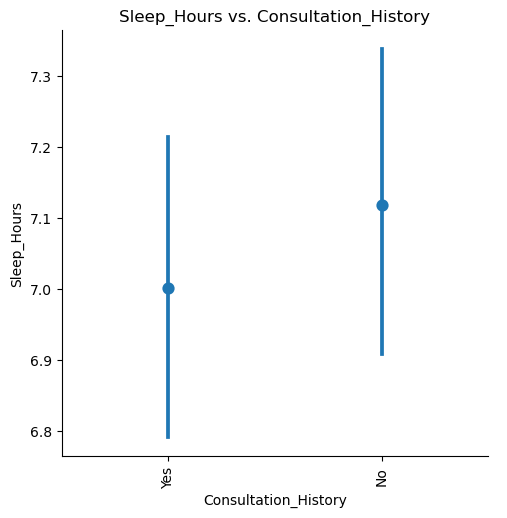

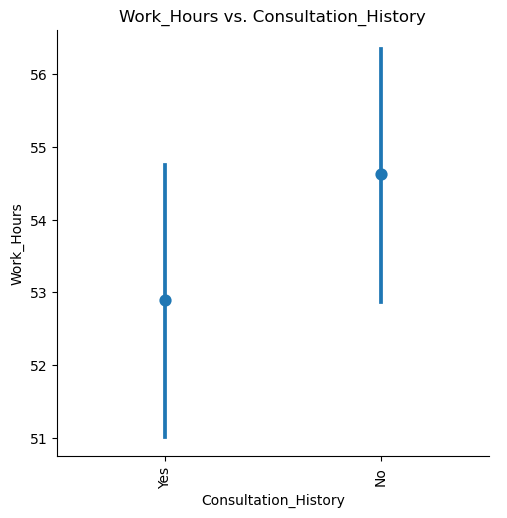

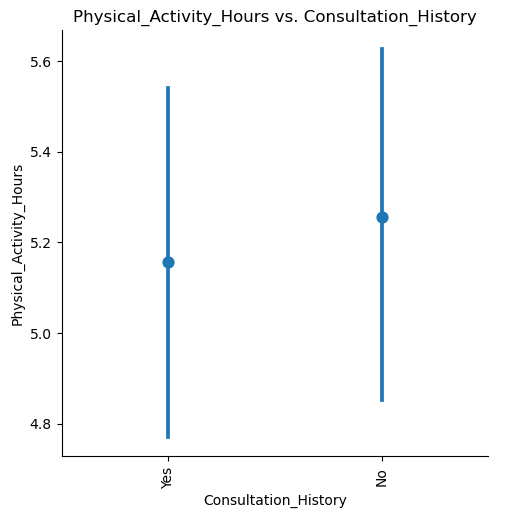

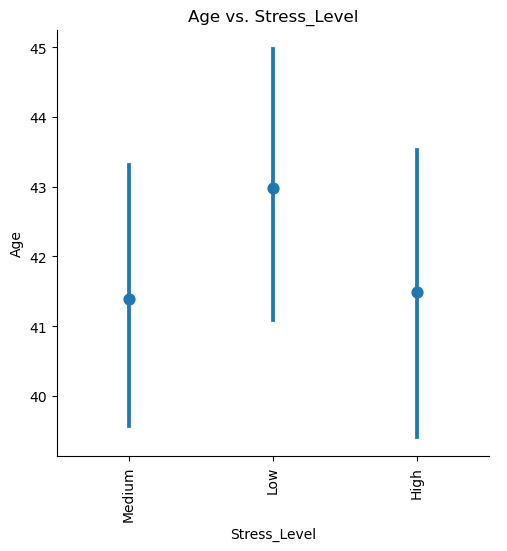

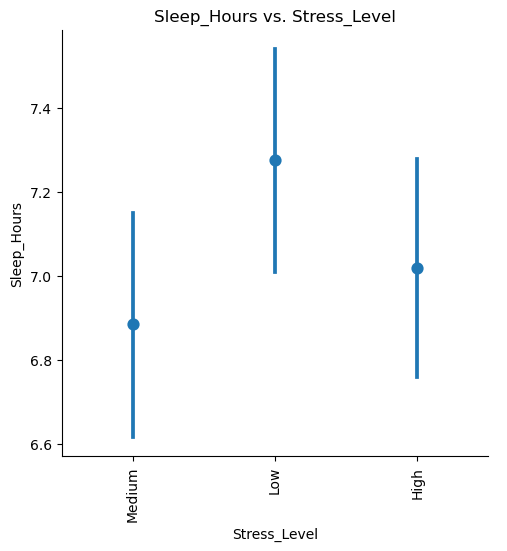

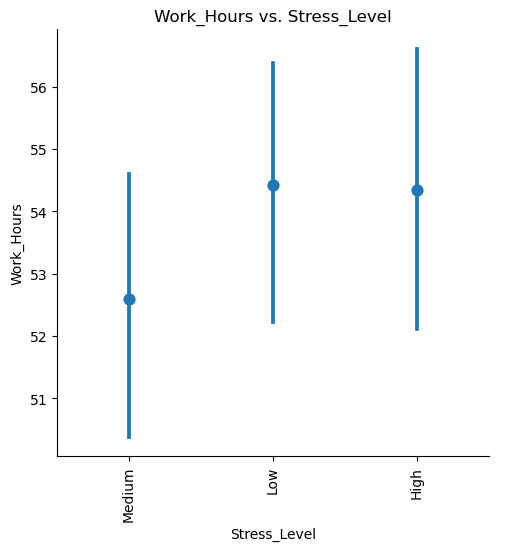

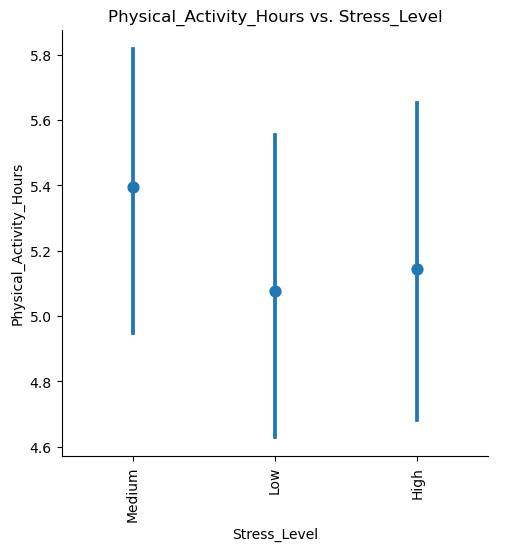

In [ ]:
for cat_input_var in cat_input_vars:
    for cont_input_var in cont_input_vars:
        sns.catplot(data=df_copy,
                    x=cat_input_var,
                    y=cont_input_var,
                    kind='point',
                    linestyles='')
        plt.title(f'{cont_input_var} vs. {cat_input_var}')
        plt.xticks(rotation=90)
        plt.show()

### Continuous-to-Continuous Relationships or Conditional Distributions: Pair Plot & Correlation Plot
* The pair plot and correlation matrix visualize continuous-to-continuous relationships in variables like Age, Sleep_Hours, Work_Hours, and Physical_Activity_Hours. The pair plot reveals no clear trends or linear relationships among these variables, with scattered data points across plots. The correlation matrix confirms weak or negligible correlations among variables, as all values are close to zero. This suggests that these features are largely independent, showing minimal association with one another.

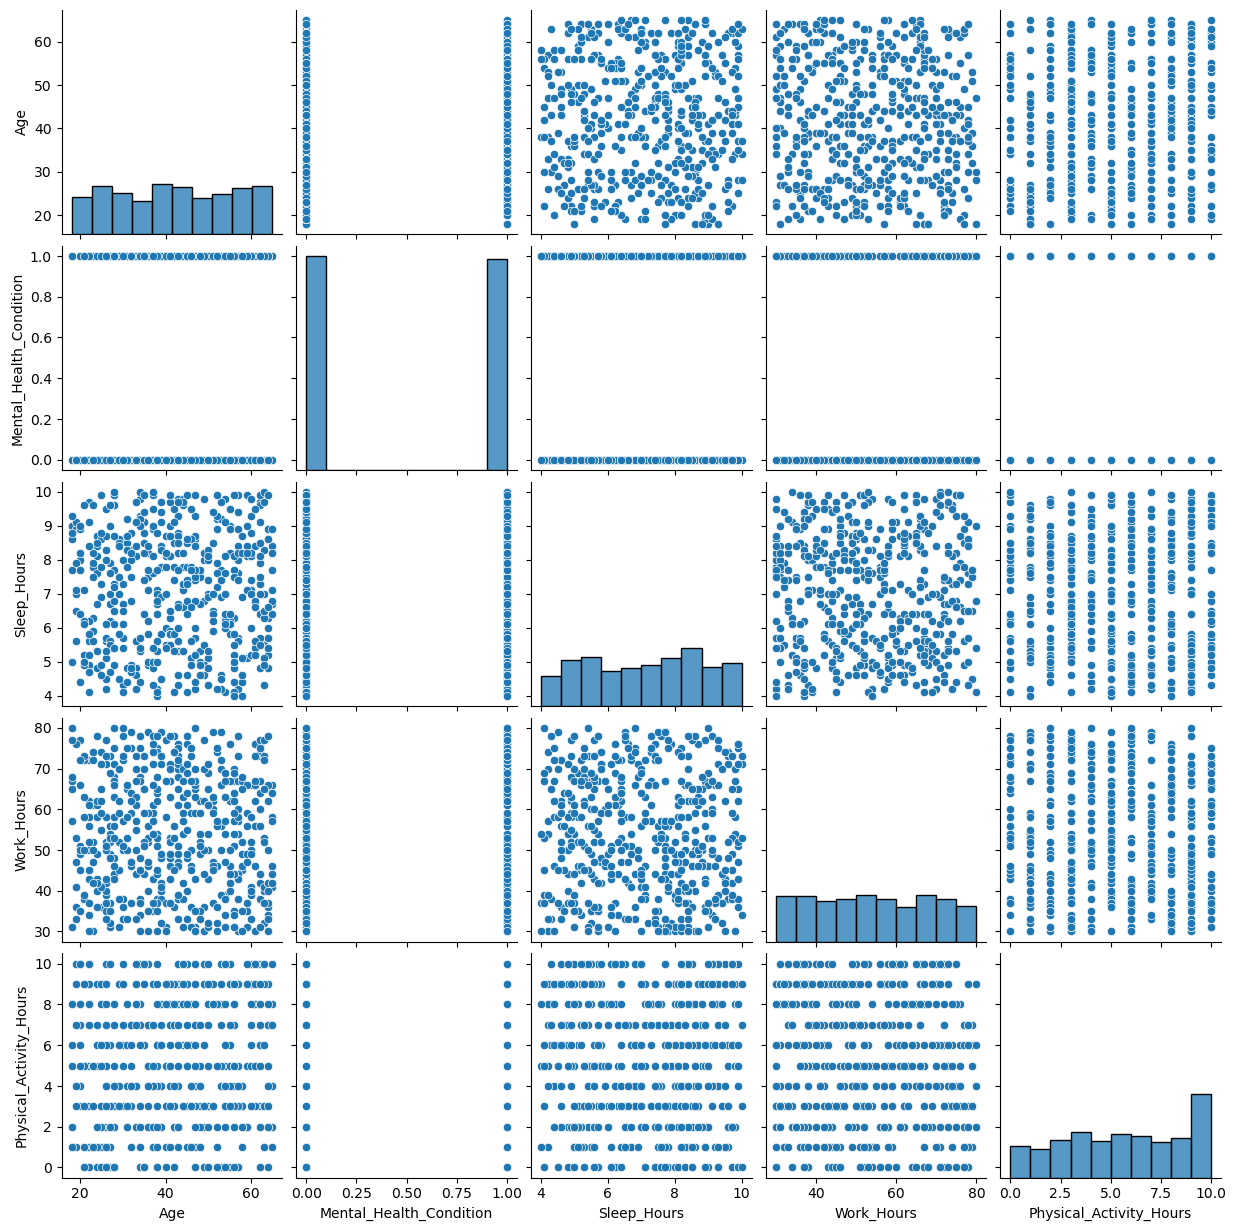

In [ ]:
pair_plot = sns.pairplot(data=df_copy)
plt.show()

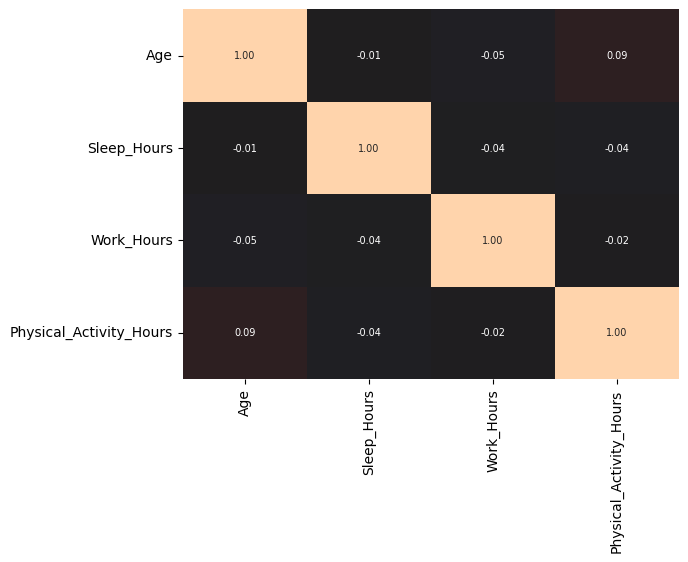

In [ ]:
fig, ax = plt.subplots()
sns.heatmap(data=df_copy.drop(columns=[target]).\
            corr(numeric_only=True),
            vmin=-1,
            vmax=1,
            center=0,
            cbar=False,
            annot=True,
            annot_kws={'size': 7},
            fmt='.2f',
            ax=ax)
plt.xticks(rotation=90)
plt.show()

## Binary Classification Model

In [ ]:
df_copy.dtypes

Age                          int64
Gender                      object
Occupation                  object
Country                     object
Mental_Health_Condition      int64
Severity                    object
Consultation_History        object
Stress_Level                object
Sleep_Hours                float64
Work_Hours                   int64
Physical_Activity_Hours      int64
dtype: object

### Formulas

#### Formula 0: Additive Terms Only

In [ ]:
formula_additive = """
    Mental_Health_Condition ~
    Age +
    C(Gender) +
    C(Occupation) +
    C(Country) +
    C(Severity) +
    C(Consultation_History) +
    C(Stress_Level) +
    Sleep_Hours +
    Work_Hours +
    Physical_Activity_Hours
"""

#### Formula 1: Additive and Interaction Terms

In [ ]:
formula_additive_and_interactive = """
    Mental_Health_Condition ~
    Age *
    C(Gender) +
    C(Occupation) *
    C(Country) +
    C(Severity) +
    C(Consultation_History) +
    C(Stress_Level) *
    Sleep_Hours +
    Work_Hours *
    Physical_Activity_Hours
"""

#### Formula 2: Quadratic

In [ ]:
formula_quadratic = """
    Mental_Health_Condition ~
    Age + I(Age**2) *
    C(Gender) +
    C(Occupation) *
    C(Country) +
    C(Severity) +
    C(Consultation_History) +
    C(Stress_Level) *
    (Sleep_Hours + I(Sleep_Hours**2)) +
    (Work_Hours + I(Work_Hours**2)) *
    (Physical_Activity_Hours + I(Physical_Activity_Hours**2))
"""

#### Formula 3: Cubic

In [ ]:
formula_cubic = """
    Mental_Health_Condition ~
    Age + I(Age**2) + I(Age**3) *
    C(Gender) +
    C(Occupation) *
    C(Country) +
    C(Severity) +
    C(Consultation_History) +
    C(Stress_Level) *
    (Sleep_Hours + I(Sleep_Hours**2) + I(Sleep_Hours**3)) +
    (Work_Hours + I(Work_Hours**2) + I(Work_Hours**3)) *
    (Physical_Activity_Hours + I(Physical_Activity_Hours**2) + I(Physical_Activity_Hours**3))
"""

#### Formula 4: Quartic

In [ ]:
formula_quartic = """
    Mental_Health_Condition ~
    Age + I(Age**2) + I(Age**3) + I(Age**4) *
    C(Gender) +
    C(Occupation) *
    C(Country) +
    C(Severity) +
    C(Consultation_History) +
    C(Stress_Level) *
    (Sleep_Hours + I(Sleep_Hours**2) + I(Sleep_Hours**3) + I(Sleep_Hours**4)) +
    (Work_Hours + I(Work_Hours**2) + I(Work_Hours**3) + I(Work_Hours**4)) *
    (Physical_Activity_Hours + I(Physical_Activity_Hours**2) + I(Physical_Activity_Hours**3) + I(Physical_Activity_Hours**4))
"""

#### Formula 5: Quadratic Simple

In [ ]:
formula_quadratic_simple = """
    Mental_Health_Condition ~
    Age + I(Age**2) +
    C(Gender) +
    C(Occupation) +
    C(Country) +
    C(Severity) +
    C(Consultation_History) +
    C(Stress_Level) +
    Sleep_Hours + I(Sleep_Hours**2) +
    Work_Hours + I(Work_Hours**2) +
    Physical_Activity_Hours + I(Physical_Activity_Hours**2)
"""

#### Formula 6: Full Quadratic Interactions

In [ ]:
formula_full_quadratic_interactions = """
    Mental_Health_Condition ~
    (Age + I(Age**2)) * C(Gender) +
    C(Occupation) * C(Country) +
    C(Severity) +
    C(Consultation_History) +
    (C(Stress_Level) * (Sleep_Hours + I(Sleep_Hours**2))) +
    (Work_Hours + I(Work_Hours**2)) *
    (Physical_Activity_Hours + I(Physical_Activity_Hours**2))
"""

#### Formula 7: Log Transformation

In [ ]:
formula_log_transformation = """
    Mental_Health_Condition ~
    np.log(Age + 1) * C(Gender) +
    np.log(Work_Hours + 1) * np.log(Physical_Activity_Hours + 1)
"""

#### Formula 8: Selected Cubic Interactions

In [ ]:
formula_selected_cubic_interactions = """
    Mental_Health_Condition ~
    Age + I(Age**2) + I(Age**3) +
    C(Gender) * (Age + I(Age**2) + I(Age**3)) +
    C(Occupation) * (Age + I(Age**2) + I(Age**3)) +
    C(Country) * (Age + I(Age**2) + I(Age**3)) +
    C(Severity) +
    C(Consultation_History) +
    C(Stress_Level) * (Sleep_Hours + I(Sleep_Hours**2) + I(Sleep_Hours**3)) +
    (Work_Hours + I(Work_Hours**2) + I(Work_Hours**3)) *
    (Physical_Activity_Hours + I(Physical_Activity_Hours**2) + I(Physical_Activity_Hours**3)) +
    I(Sleep_Hours**3) * I(Work_Hours**3) * I(Physical_Activity_Hours**3) +
    Age * I(Sleep_Hours**3) * I(Work_Hours**3) +
    C(Stress_Level) * I(Sleep_Hours**3) +
    C(Gender) * I(Work_Hours**3)
"""

#### Formula 9: Hybrid

In [ ]:
formula_hybrid = """
    Mental_Health_Condition ~
    Age + I(Age**2) *
    C(Gender) *
    C(Occupation) +
    C(Country) *
    C(Severity) +
    C(Consultation_History) *
    C(Stress_Level) * np.log(Sleep_Hours + 1) *
    (Work_Hours + I(Work_Hours**2)) * np.log(Physical_Activity_Hours + 1)
"""

#### Combined Formulas

In [ ]:
formulas = [formula_additive,
            formula_additive_and_interactive,
            formula_quadratic,
            formula_cubic,
            formula_quartic,
            formula_quadratic_simple,
            formula_full_quadratic_interactions,
            formula_log_transformation,
            formula_selected_cubic_interactions,
            formula_hybrid]

### Apply 5-Fold Cross-Validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
kf = StratifiedKFold(n_splits=5,
                     shuffle=True,
                     random_state=101)

### Fit the Logistic Regression Models w/ Statsmodels

In [ ]:
input_names = df.drop(columns=[target]).\
                      copy().\
                      columns.\
                      to_list()

In [ ]:
output_name = target

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
def my_coefplot(model, figsize_default=(10, 4), figsize_expansion_factor=0.5, max_default_vars=10):
    """
    Function that plots a coefficient plot with error bars for a given statistical model
    and prints out which variables are statistically significant and whether they are positive or negative.
    The graph height dynamically adjusts based on the number of variables.

    Params:
        model: object
        figsize_default: tuple, optional
        figsize_expansion_factor: float, optional
        max_default_vars: int, optional
    """
    # cap the standard errors (bse) to avoid overly large error bars, upper bound set to 2
    capped_bse = model.bse.clip(upper=2)

    # calculate the minimum and maximum coefficient values adjusted by the standard errors
    coef_min = (model.params - 2 * capped_bse).min()
    coef_max = (model.params + 2 * capped_bse).max()

    # define buffer space for the x-axis limits
    buffer_space = 0.5
    xlim_min = coef_min - buffer_space
    xlim_max = coef_max + buffer_space

    # dynamically calculate figure height based on the number of variables
    num_vars = len(model.params)
    if num_vars > max_default_vars:
        height = figsize_default[1] + figsize_expansion_factor * (num_vars - max_default_vars)
    else:
        height = figsize_default[1]

    # create the plot
    fig, ax = plt.subplots(figsize=(figsize_default[0], height))

    # identify statistically significant and non-significant variables based on p-values
    significant_vars = model.pvalues[model.pvalues < 0.05].index
    not_significant_vars = model.pvalues[model.pvalues >= 0.05].index

    # plot non-significant variables with grey error bars
    ax.errorbar(y=not_significant_vars,
                x=model.params[not_significant_vars],
                xerr=2 * capped_bse[not_significant_vars],
                fmt='o',
                color='grey',
                ecolor='grey',
                elinewidth=2,
                ms=10,
                label='not significant')

    # plot significant variables with red error bars
    ax.errorbar(y=significant_vars,
                x=model.params[significant_vars],
                xerr=2 * capped_bse[significant_vars],
                fmt='o',
                color='red',
                ecolor='red',
                elinewidth=2,
                ms=10,
                label='significant (p < 0.05)')

    # add a vertical line at 0 to visually separate positive and negative coefficients
    ax.axvline(x=0, linestyle='--', linewidth=2.5, color='grey')

    # adjust the x-axis limits to add some buffer space on either side
    ax.set_xlim(min(-0.5, coef_min - 0.2), max(0.5, coef_max + 0.2))
    ax.set_xlabel('coefficient value')

    # add legend to distinguish between significant and non-significant variables
    ax.legend()

    # show the plot
    plt.show()

    # print the summary of statistically significant variables
    print('\n--- statistically significant variables ---')

    # check if there are any significant variables, if not, print a message
    if significant_vars.empty:
        print('No statistically significant variables found.')
    else:
        # for each significant variable, print its coefficient, standard error, p-value, and direction
        for var in significant_vars:
            coef_value = model.params[var]
            std_err = model.bse[var]
            p_val = model.pvalues[var]
            direction = 'positive' if coef_value > 0 else 'negative'
            print(f'variable: {var}, coefficient: {coef_value:.4f}, std err: {std_err:.4f}, p-value: {p_val:.4f}, direction: {direction}')

In [ ]:
def train_and_test_logistic_with_cv(model, formula, df, x_names, y_name, cv, threshold=0.5, use_scaler=True):
    """
    Function to train and test a logistic binary classification model with Cross-Validation,
    including accuracy and ROC AUC score calculations.

    Params:
        model: object
        formula: str
        df: object
        x_names: list
        y_name: str
        cv: object
        threshold: float, optional
        use_scaler: bool, optional

    Returns:
        object
    """
    # separate the inputs and output
    input_df = df.loc[:, x_names].copy()

    # initialize the performance metric storage lists
    train_res = []
    test_res = []
    train_auc_scores = []
    test_auc_scores = []

    # split the data and iterate over the folds
    for train_id, test_id in cv.split(input_df.to_numpy(), df[y_name].to_numpy()):

        # subset the training and test splits within each fold
        train_data = df.iloc[train_id, :].copy()
        test_data = df.iloc[test_id, :].copy()

        # if the use_scaler flag is set, standardize the numeric features within each fold
        if use_scaler:
            scaler = StandardScaler()

            # identify numeric columns to scale, excluding the target variable
            columns_to_scale = train_data.select_dtypes(include=[np.number]).columns.tolist()
            columns_to_scale = [col for col in columns_to_scale if col != y_name]

            # fit scaler on training data
            scaler.fit(train_data[columns_to_scale])

            # transform training and test data
            train_data[columns_to_scale] = scaler.transform(train_data[columns_to_scale])
            test_data[columns_to_scale] = scaler.transform(test_data[columns_to_scale])

        # fit the model on the training data within the current fold
        a_model = smf.logit(formula=formula, data=train_data).fit()

        # predict the training within each fold
        train_copy = train_data.copy()
        train_copy['pred_probability'] = a_model.predict(train_data)
        train_copy['pred_class'] = np.where(train_copy.pred_probability > threshold, 1, 0)

        # predict the testing within each fold
        test_copy = test_data.copy()
        test_copy['pred_probability'] = a_model.predict(test_data)
        test_copy['pred_class'] = np.where(test_copy.pred_probability > threshold, 1, 0)

        # calculate the performance metric (accuracy) on the training set within the fold
        train_res.append(np.mean(train_copy[y_name] == train_copy.pred_class))

        # calculate the performance metric (accuracy) on the testing set within the fold
        test_res.append(np.mean(test_copy[y_name] == test_copy.pred_class))

        # calculate the roc_auc_score for the training set
        train_auc_scores.append(roc_auc_score(train_copy[y_name], train_copy['pred_probability']))

        # calculate the roc_auc_score for the testing_set
        test_auc_scores.append(roc_auc_score(test_copy[y_name], test_copy['pred_probability']))

    # book keeping to store the results (accuracy)
    train_df = pd.DataFrame({'accuracy': train_res, 'roc_auc': train_auc_scores})
    train_df['from_set'] = 'training'
    train_df['fold_id'] = train_df.index + 1
    test_df = pd.DataFrame({'accuracy': test_res, 'roc_auc': test_auc_scores})
    test_df['from_set'] = 'testing'
    test_df['fold_id'] = test_df.index + 1

    # combine the splits together
    res_df = pd.concat([train_df, test_df], ignore_index=True)

    # add information about the model
    res_df['model'] = model
    res_df['formula'] = formula
    res_df['num_coefs'] = len(a_model.params)
    res_df['threshold'] = threshold

    # return the results DataFrame
    return res_df

### Test Models

In [ ]:
import os

In [ ]:
import contextlib

In [ ]:
res_list = []
error_log = []

with contextlib.redirect_stdout(open(os.devnull, 'w')), contextlib.redirect_stderr(open(os.devnull, 'w')):
    for model in range(len(formulas)):
        try:
            res_list.append(train_and_test_logistic_with_cv(model,
                                                            formula=formulas[model],
                                                            df=df_copy,
                                                            x_names=input_names,
                                                            y_name=output_name,
                                                            cv=kf))
        except Exception as e:
            error_log.append(f'Formula ID {model} failed: {str(e)}')

In [ ]:
cv_results = pd.concat(res_list, ignore_index=True)

In [ ]:
cv_results

accuracy   roc_auc  from_set  fold_id  model  \
0   0.609023  0.648568  training        1      0   
1   0.558897  0.607995  training        2      0   
2   0.581454  0.603925  training        3      0   
3   0.588972  0.611865  training        4      0   
4   0.575000  0.620616  training        5      0   
5   0.430000  0.361745   testing        1      0   
6   0.500000  0.502400   testing        2      0   
7   0.430000  0.468000   testing        3      0   
8   0.440000  0.486400   testing        4      0   
9   0.404040  0.391020   testing        5      0   
10  0.706767  0.782940  training        1      3   
11  0.739348  0.795065  training        2      3   
12  0.711779  0.754711  training        3      3   
13  0.679198  0.754159  training        4      3   
14  0.685000  0.760444  training        5      3   
15  0.470000  0.468988   testing        1      3   
16  0.480000  0.418000   testing        2      3   
17  0.510000  0.493600   testing        3      3   
18  0.520000  0.534000   testing        4      3   
19  0.535354  0.540816   testing        5      3   
20  0.719298  0.795905  training        1      4   
21  0.711779  0.798935  training        2      4   
22  0.694236  0.771521  training        3      4   
23  0.691729  0.761797  training        4      4   
24  0.697500  0.773394  training        5      4   
25  0.450000  0.438575   testing        1      4   
26  0.440000  0.397600   testing        2      4   
27  0.450000  0.459200   testing        3      4   
28  0.540000  0.525600   testing        4      4   
29  0.525253  0.495102   testing        5      4   
30  0.616541  0.665528  training        1      5   
31  0.578947  0.618448  training        2      5   
32  0.581454  0.611689  training        3      5   
33  0.581454  0.619755  training        4      5   
34  0.585000  0.622916  training        5      5   
35  0.360000  0.351341   testing        1      5   
36  0.480000  0.496000   testing        2      5   
37  0.430000  0.473600   testing        3      5   
38  0.490000  0.494800   testing        4      5   
39  0.404040  0.420000   testing        5      5   
40  0.704261  0.799070  training        1      8   
41  0.716792  0.794236  training        2      8   
42  0.716792  0.784989  training        3      8   
43  0.696742  0.762450  training        4      8   
44  0.695000  0.784745  training        5      8   
45  0.390000  0.371749   testing        1      8   
46  0.500000  0.470000   testing        2      8   
47  0.480000  0.459600   testing        3      8   
48  0.530000  0.538400   testing        4      8   
49  0.484848  0.457551   testing        5      8   

                                              formula  num_coefs  threshold  
0   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
1   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
2   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
3   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
4   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
5   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
6   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
7   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
8   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
9   \n    Mental_Health_Condition ~ \n    Age +\n ...         25        0.5  
10  \n    Mental_Health_Condition ~ \n    Age + I(...         87        0.5  
11  \n    Mental_Health_Condition ~ \n    Age + I(...         87        0.5  
12  \n    Mental_Health_Condition ~ \n    Age + I(...         87        0.5  
13  \n    Mental_Health_Condition ~ \n    Age + I(...         87        0.5  
14  \n    Mental_Health_Condition ~ \n    Age + I(...         87        0.5  
15  \n    Mental_Health_Condition ~ \n    Age + I(...         87        0.5  
16  \n    Mental_Health_C

### Review Model Results - Average of Folds

#### All Models w/ Highest Accuracy on the Testing Dataset

In [ ]:
cv_results.loc[(cv_results['from_set'] == 'testing') &
               (cv_results['accuracy'] < 1.0) &
               (cv_results['roc_auc'] < 1.0)].\
           groupby('model').\
           aggregate({'accuracy': 'mean',
                      'roc_auc': 'mean',
                      'num_coefs': 'first'}).\
           reset_index().\
           sort_values(by='accuracy', ascending=False)

model  accuracy   roc_auc  num_coefs
1      3  0.503071  0.491081         87
2      4  0.481051  0.463215        100
4      8  0.476970  0.459460        102
0      0  0.440808  0.441913         25
3      5  0.432808  0.447148         29

### Model Selection
* Model 3 was selected for its configuration, achieving an accuracy of 50.3% and an ROC AUC of 49.1%, indicating near-random performance. The model includes 87 coefficients, of which a subset is statistically significant with p-values below 0.05. Significant variables include interactions between occupation and country, such as C(Occupation)[T.IT]:C(Country)[T.Germany] (coefficient: -3.8900, p-value: 0.0297) and C(Occupation)[T.Engineering]:C(Country)[T.India] (coefficient: 3.4107, p-value: 0.0307). Physical and work activities also show significance, with Physical_Activity_Hours (coefficient: 38.5331, p-value: 0.0357) positively associated and various polynomial terms involving Work_Hours and Physical_Activity_Hours exhibiting mixed directions. Despite identifying statistically significant terms, the model’s overall predictive power remains limited, reflected by its accuracy and ROC AUC close to chance levels.

In [ ]:
best_model = smf.logit(formula=formulas[3],
                       data=df_copy).fit()

Optimization terminated successfully.
         Current function value: 0.603393
         Iterations 6


In [ ]:
best_model.params

Intercept                                            -40.108380
C(Gender)[T.Male]                                     -0.309341
C(Gender)[T.Non-binary]                               -0.286941
C(Gender)[T.Prefer not to say]                         0.055080
C(Occupation)[T.Engineering]                          -1.492603
                                                        ...    
I(Work_Hours ** 2):I(Physical_Activity_Hours ** 2)    -0.010230
I(Work_Hours ** 2):I(Physical_Activity_Hours ** 3)     0.000599
I(Work_Hours ** 3):Physical_Activity_Hours            -0.000315
I(Work_Hours ** 3):I(Physical_Activity_Hours ** 2)     0.000065
I(Work_Hours ** 3):I(Physical_Activity_Hours ** 3)    -0.000004
Length: 87, dtype: float64

In [ ]:
best_model.pvalues < 0.05

Intercept                                             False
C(Gender)[T.Male]                                     False
C(Gender)[T.Non-binary]                               False
C(Gender)[T.Prefer not to say]                        False
C(Occupation)[T.Engineering]                          False
                                                      ...  
I(Work_Hours ** 2):I(Physical_Activity_Hours ** 2)     True
I(Work_Hours ** 2):I(Physical_Activity_Hours ** 3)    False
I(Work_Hours ** 3):Physical_Activity_Hours             True
I(Work_Hours ** 3):I(Physical_Activity_Hours ** 2)     True
I(Work_Hours ** 3):I(Physical_Activity_Hours ** 3)    False
Length: 87, dtype: bool

In [ ]:
best_model.params[best_model.pvalues < 0.05].sort_values(ascending=False)

Physical_Activity_Hours                               38.533052
C(Occupation)[T.Engineering]:C(Country)[T.India]       3.410654
Work_Hours:I(Physical_Activity_Hours ** 2)             0.515447
I(Work_Hours ** 2):Physical_Activity_Hours             0.049221
I(Work_Hours ** 3)                                     0.000329
I(Work_Hours ** 3):I(Physical_Activity_Hours ** 2)     0.000065
I(Work_Hours ** 3):Physical_Activity_Hours            -0.000315
I(Work_Hours ** 2):I(Physical_Activity_Hours ** 2)    -0.010230
I(Work_Hours ** 2)                                    -0.050886
Work_Hours:Physical_Activity_Hours                    -2.444485
C(Occupation)[T.Finance]:C(Country)[T.USA]            -2.771477
C(Occupation)[T.IT]:C(Country)[T.Germany]             -3.890004
dtype: float64

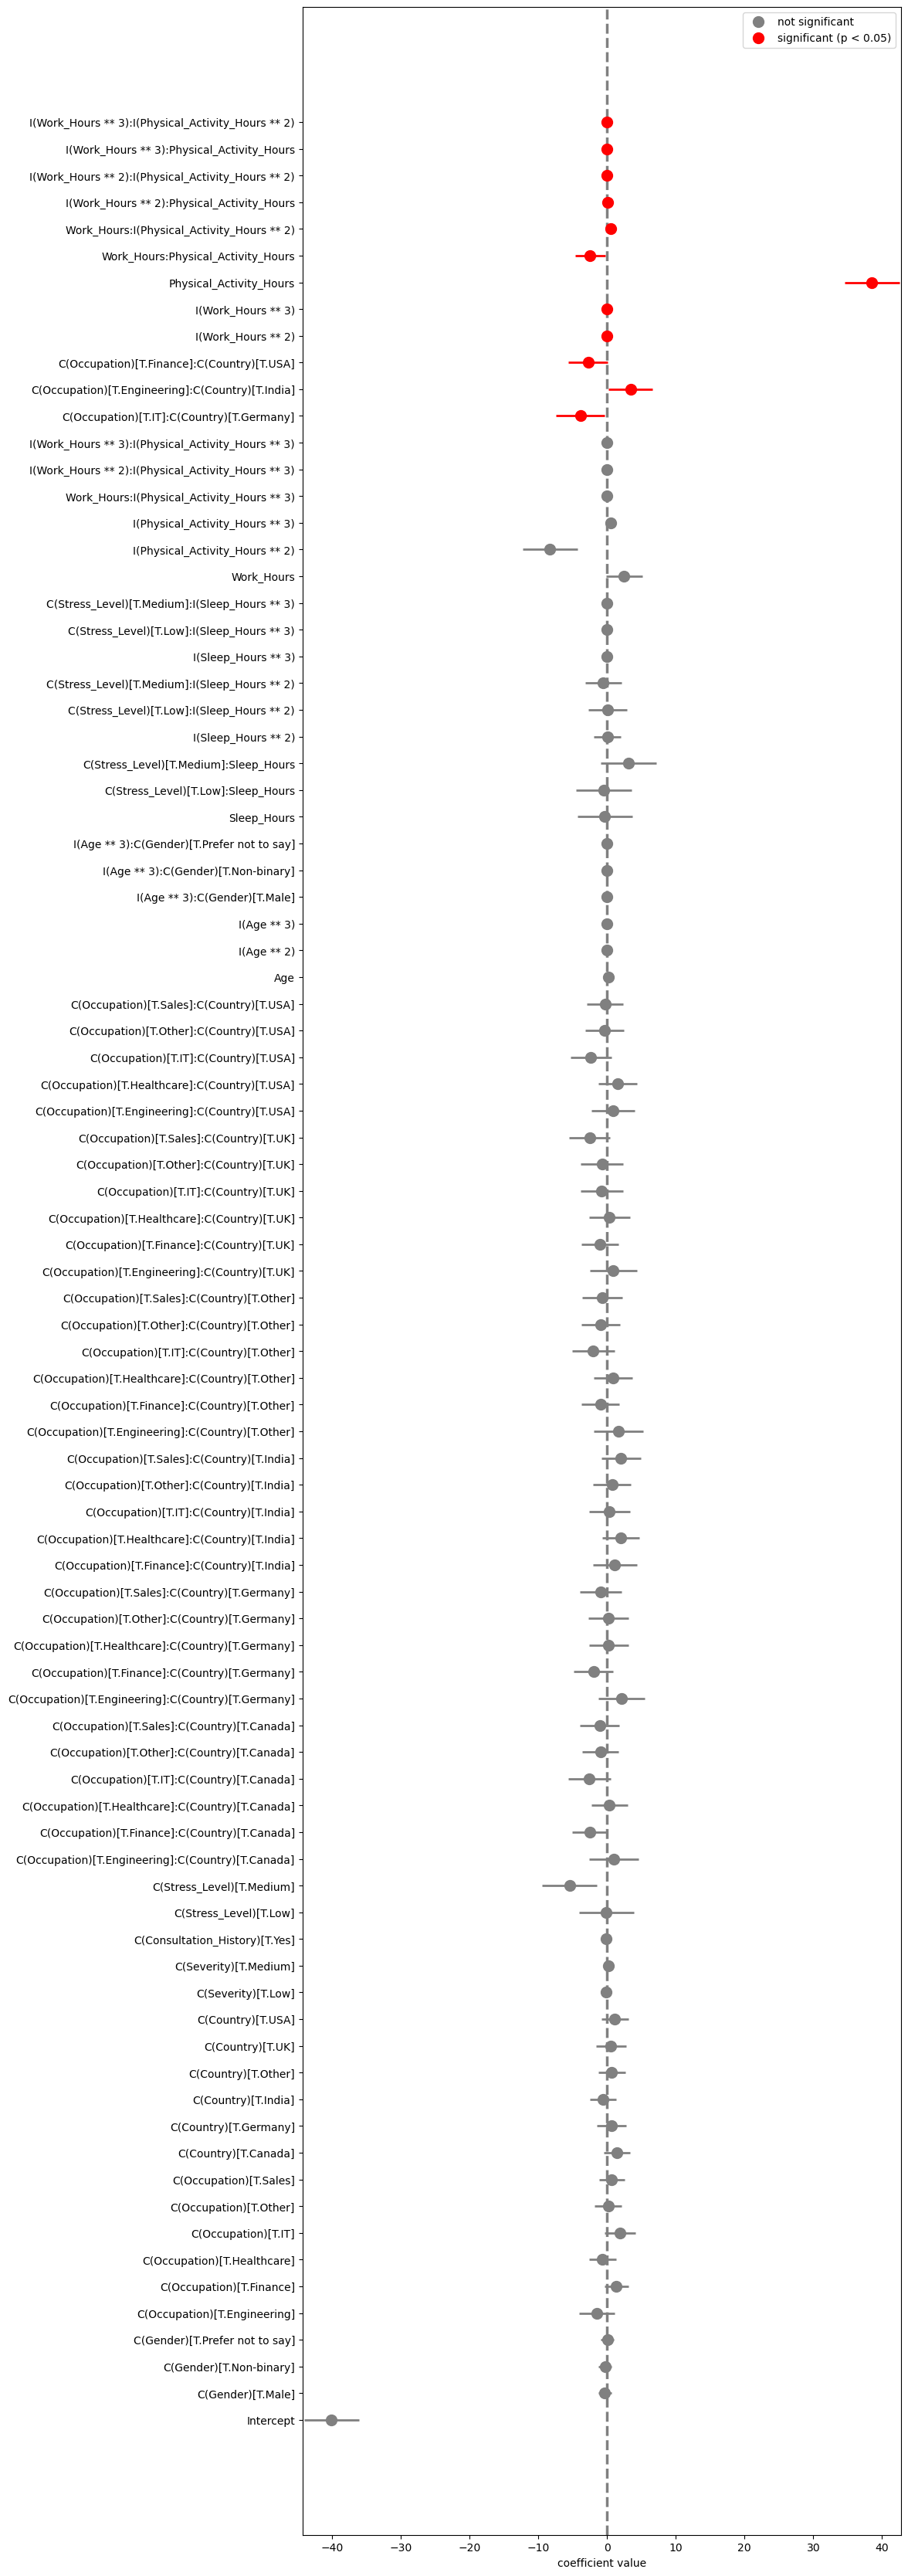


--- statistically significant variables ---
variable: C(Occupation)[T.IT]:C(Country)[T.Germany], coefficient: -3.8900, std err: 1.7894, p-value: 0.0297, direction: negative
variable: C(Occupation)[T.Engineering]:C(Country)[T.India], coefficient: 3.4107, std err: 1.5786, p-value: 0.0307, direction: positive
variable: C(Occupation)[T.Finance]:C(Country)[T.USA], coefficient: -2.7715, std err: 1.4093, p-value: 0.0492, direction: negative
variable: I(Work_Hours ** 2), coefficient: -0.0509, std err: 0.0254, p-value: 0.0452, direction: negative
variable: I(Work_Hours ** 3), coefficient: 0.0003, std err: 0.0002, p-value: 0.0379, direction: positive
variable: Physical_Activity_Hours, coefficient: 38.5331, std err: 18.3446, p-value: 0.0357, direction: positive
variable: Work_Hours:Physical_Activity_Hours, coefficient: -2.4445, std err: 1.1100, p-value: 0.0276, direction: negative
variable: Work_Hours:I(Physical_Activity_Hours ** 2), coefficient: 0.5154, std err: 0.2603, p-value: 0.0477, directi

In [ ]:
my_coefplot(best_model)

### Save Model - Usage in Inference Application

In [ ]:
import pickle

In [ ]:
with open('mental_health_logit_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

### Load Model - Usage in Inference Application

In [ ]:
with open('mental_health_logit_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

### Perform Inference - Validate Production Model

In [ ]:
sample_data = pd.DataFrame({
    'Age': [24],
    'Gender': ['Male'],
    'Occupation': ['Healthcare'],
    'Country': ['USA'],
    'Severity': ['Medium'],
    'Consultation_History': ['Yes'],
    'Stress_Level': ['High'],
    'Sleep_Hours': [7.5],
    'Work_Hours': [40],
    'Physical_Activity_Hours': [5]
})

In [ ]:
loaded_model.predict(sample_data)

0    0.697895
dtype: float64